# Read in Data

In [918]:
# ================================================================================
# Splitting training and test sets
# ================================================================================

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('WAGE2_2025_abridged.csv')

state= (540491669 + 540712391 + 540575497 + 540750669 + 540744934)   # replace this number with the sum of the student IDs for the members of your group

train = data.sample(frac=0.8, random_state=state)
test = data[data.index.isin(train.index)==False].copy() # Only for prediction

train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

In [919]:
train.head()

wage  hours   IQ  KWW  educ  exper  tenure  age  married  black  south  \
0  1160     40   92   32    12      8       8   31        1      0      0   
1   722     55  113   36    16      8       1   38        0      0      1   
2  1160     40   84   35    12     17       2   38        1      0      0   
3  1000     50  104   36    16     11       8   30        1      0      0   
4   978     48  104   36    12     19      15   36        1      0      0   

   urban  sibs  brthord  meduc  feduc     lwage  
0      0     4      1.0   12.0   11.0  7.056175  
1      1     1      2.0    8.0    NaN  6.582025  
2      0     4      2.0   16.0   12.0  7.056175  
3      1     1      1.0   12.0   11.0  6.907755  
4      1     5      6.0    6.0    NaN  6.885510

In [920]:
train.isnull().sum()

wage         0
hours        0
IQ           0
KWW          0
educ         0
exper        0
tenure       0
age          0
married      0
black        0
south        0
urban        0
sibs         0
brthord     62
meduc       56
feduc      152
lwage        0
dtype: int64

# **Task 1**

### Numerical Summaries ###

In [923]:
numerical = train[['wage', 'hours', 'IQ', 'KWW', 'educ', 'exper', 'tenure', 'age', 'sibs', 'meduc', 'feduc', 'lwage']]
numerical.describe().round(3)

wage    hours       IQ      KWW     educ    exper   tenure  \
count   733.000  733.000  733.000  733.000  733.000  733.000  733.000   
mean    962.921   44.082  101.854   35.801   13.501   11.487    7.235   
std     402.656    7.134   14.500    7.656    2.182    4.456    5.089   
min     200.000   20.000   54.000   12.000    9.000    1.000    0.000   
25%     675.000   40.000   93.000   31.000   12.000    8.000    3.000   
50%     910.000   40.000  103.000   37.000   12.000   11.000    7.000   
75%    1186.000   48.000  112.000   41.000   16.000   15.000   11.000   
max    3078.000   80.000  145.000   56.000   18.000   23.000   22.000   

           age     sibs    meduc    feduc    lwage  
count  733.000  733.000  677.000  581.000  733.000  
mean    33.034    2.898   10.703   10.176    6.787  
std      3.122    2.199    2.843    3.317    0.412  
min     28.000    0.000    0.000    0.000    5.298  
25%     30.000    1.000    8.000    8.000    6.515  
50%     33.000    2.000   12.000   10.000    6.813  
75%     36.000    4.000   12.000   12.000    7.078  
max     38.000   14.000   18.000   18.000    8.032

### Categorical summaries ###

In [925]:
tab=pd.crosstab(data['married'], columns="count");tab

col_0    count
married       
0           98
1          818

In [926]:
tab=pd.crosstab(data['black'], columns="count");tab

col_0  count
black       
0        807
1        109

In [927]:
tab=pd.crosstab(data['south'], columns="count");tab

col_0  count
south       
0        608
1        308

In [928]:
tab=pd.crosstab(data['urban'], columns="count");tab

col_0  count
urban       
0        256
1        660

In [929]:
tab=pd.crosstab(data['brthord'], columns="count");tab

col_0    count
brthord       
1.0        339
2.0        237
3.0        125
4.0         56
5.0         33
6.0         28
7.0          8
8.0          5
9.0          2
10.0         3

### Visuals ###

<Axes: xlabel='wage'>

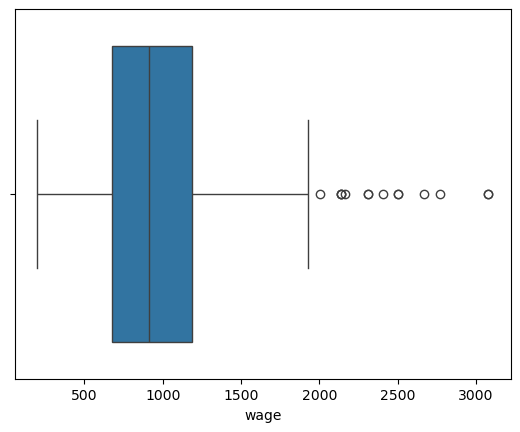

In [931]:
sns.boxplot(x=train['wage'])

<Axes: xlabel='married', ylabel='wage'>

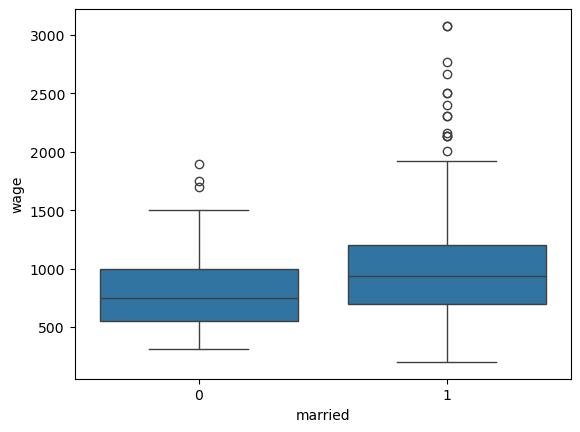

In [932]:
sns.boxplot(x='married', y='wage', data=train)

<Axes: xlabel='black', ylabel='wage'>

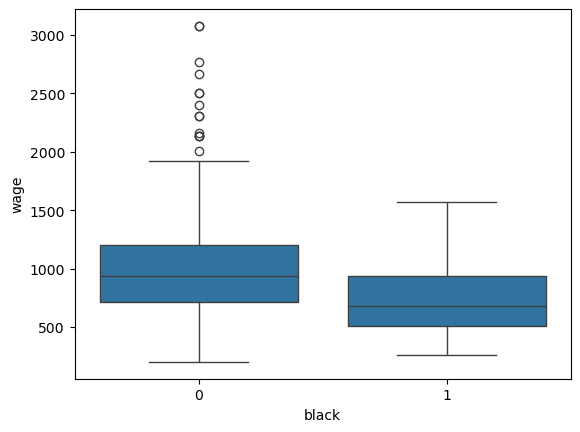

In [933]:
sns.boxplot(x='black', y='wage', data=train)

In [934]:
print(data.groupby('south')['wage'].mean())

south
0    1006.052632
1     868.993506
Name: wage, dtype: float64


In [935]:
print(data.groupby('urban')['wage'].mean())

urban
0     832.332031
1    1009.474242
Name: wage, dtype: float64


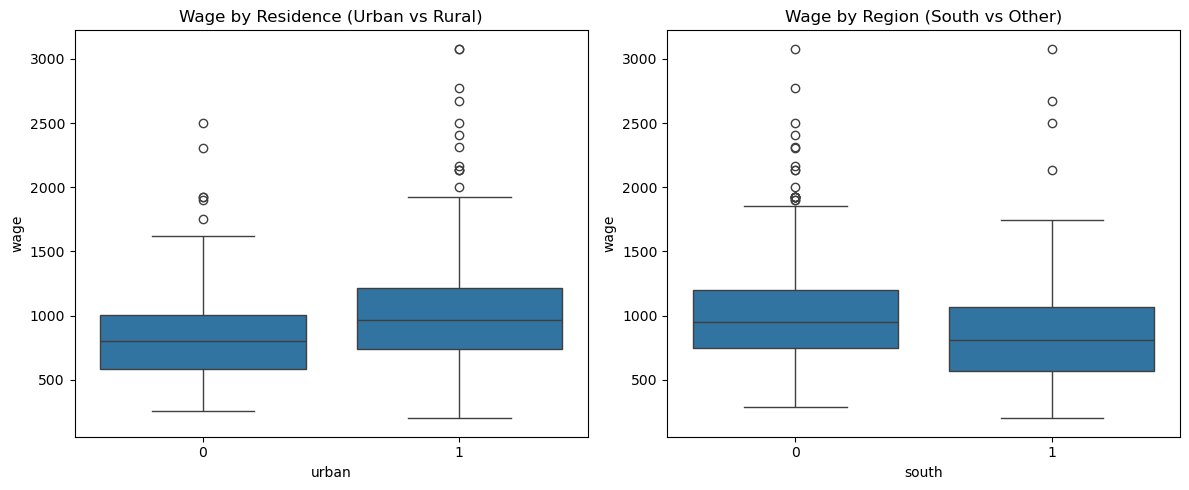

In [936]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Boxplot 1: Urban vs Rural
sns.boxplot(x='urban', y='wage', data=train, ax=axes[0])
axes[0].set_title("Wage by Residence (Urban vs Rural)")

# Boxplot 2: South vs Other
sns.boxplot(x='south', y='wage', data=train, ax=axes[1])
axes[1].set_title("Wage by Region (South vs Other)")

plt.tight_layout()
plt.savefig('region wage.png')
plt.show()

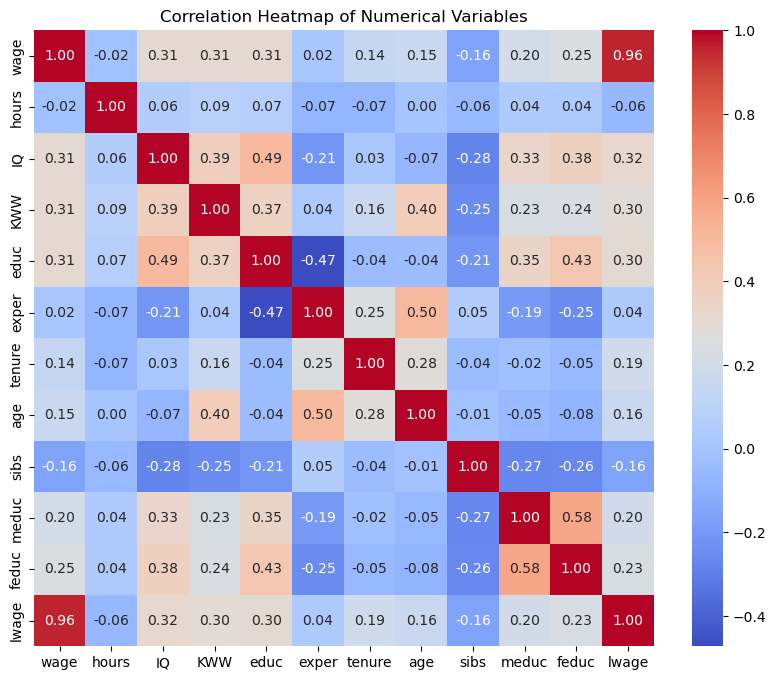

In [937]:
corr_matrix = numerical.corr()

plt.figure(figsize=(10, 8))  # Optional: adjust size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.savefig('heatmap all var.png')
plt.show()

### Comparing education in sub groups ###

In [939]:
print(data.groupby('south')['educ'].mean())

south
0    13.648026
1    13.185065
Name: educ, dtype: float64


In [940]:
print(data.groupby('urban')['educ'].mean())

urban
0    13.238281
1    13.590909
Name: educ, dtype: float64


In [941]:
print(data.groupby('black')['educ'].mean())

black
0    13.629492
1    12.477064
Name: educ, dtype: float64


In [942]:
print(data.groupby('married')['educ'].mean())

married
0    13.846939
1    13.449878
Name: educ, dtype: float64


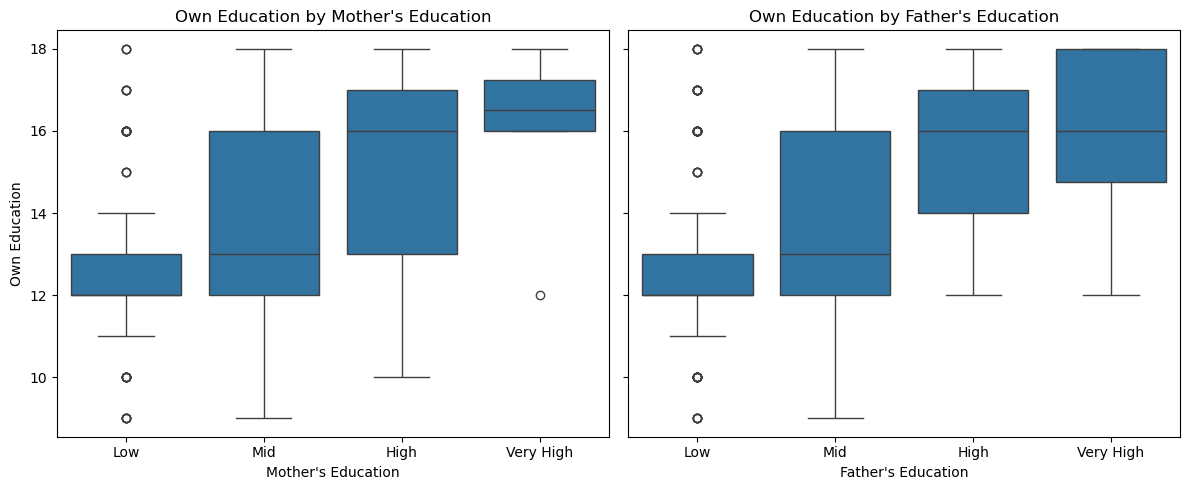

In [943]:
# Create bins for mother and father education
train['meduc_bin'] = pd.cut(train['meduc'], bins=[0, 8, 12, 16, 20], labels=['Low', 'Mid', 'High', 'Very High'])
train['feduc_bin'] = pd.cut(train['feduc'], bins=[0, 8, 12, 16, 20], labels=['Low', 'Mid', 'High', 'Very High'])

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Mother's education
sns.boxplot(x='meduc_bin', y='educ', data=train, ax=axes[0])
axes[0].set_title("Own Education by Mother's Education")
axes[0].set_xlabel("Mother's Education")
axes[0].set_ylabel("Own Education")

# Father's education
sns.boxplot(x='feduc_bin', y='educ', data=train, ax=axes[1])
axes[1].set_title("Own Education by Father's Education")
axes[1].set_xlabel("Father's Education")
axes[1].set_ylabel("")

plt.tight_layout()
plt.savefig('parental education vs own education.png')
plt.show()

# **Task 2**

### MLR of education and experience on wage

In [946]:
t2_model = smf.ols('wage ~ educ + exper', data=train)
t2_reg = t2_model.fit()
t2_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     55.84
Date:                Wed, 28 May 2025   Prob (F-statistic):           2.72e-23
Time:                        15:43:53   Log-Likelihood:                -5384.0
No. Observations:                 733   AIC:                         1.077e+04
Df Residuals:                     730   BIC:                         1.079e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -288.7780    122.739     -2.353      0.019    -529.742     -47.814
educ          76.1294      7.216     10.550      0.000      61.963      90.296
exper         19.4915      3.534      5.516      0.000      12.554      26.429
==============================================================================
Omnibus:                      191.273   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              647.797
Skew:                           1.221   Prob(JB):                    2.15e-141
Kurtosis:                       6.905   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [947]:
#Extracting Fitted Values and Residuals from the Regression Model
t2_fit = t2_reg.fittedvalues
t2_resid = t2_reg.resid

In [948]:
t2_reg.mse_resid**0.5

375.5059302119657

In [949]:
t2_reg_rob = t2_model.fit(cov_type = 'HC0')
t2_reg_rob.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     47.42
Date:                Wed, 28 May 2025   Prob (F-statistic):           4.36e-20
Time:                        15:43:53   Log-Likelihood:                -5384.0
No. Observations:                 733   AIC:                         1.077e+04
Df Residuals:                     730   BIC:                         1.079e+04
Df Model:                           2                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -288.7780    128.375     -2.249      0.024    -540.388     -37.168
educ          76.1294      7.848      9.700      0.000      60.747      91.512
exper         19.4915      3.479      5.603      0.000      12.673      26.310
==============================================================================
Omnibus:                      191.273   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              647.797
Skew:                           1.221   Prob(JB):                    2.15e-141
Kurtosis:                       6.905   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

After correcting for potential heteroskedasticity using HC1 robust standard errors, the model’s coefficients remained statistically significant, suggesting that the key relationships are robust. However, the increase in standard errors and the lower F-statistic indicate that inference under standard OLS may have understated uncertainty.

In [951]:
t2_slr_educ_model = smf.ols('wage ~ educ', data=train).fit()
t2_slr_educ_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     78.11
Date:                Wed, 28 May 2025   Prob (F-statistic):           7.21e-18
Time:                        15:43:53   Log-Likelihood:                -5399.0
No. Observations:                 733   AIC:                         1.080e+04
Df Residuals:                     731   BIC:                         1.081e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    188.8699     88.719      2.129      0.034      14.695     363.045
educ          57.3342      6.487      8.838      0.000      44.598      70.070
==============================================================================
Omnibus:                      179.416   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              550.454
Skew:                           1.179   Prob(JB):                    2.95e-120
Kurtosis:                       6.531   Cond. No.                         86.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [952]:
t2_slr_exper_model = smf.ols('wage ~ exper', data=train).fit()
t2_slr_exper_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3188
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.572
Time:                        15:43:53   Log-Likelihood:                -5436.0
No. Observations:                 733   AIC:                         1.088e+04
Df Residuals:                     731   BIC:                         1.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    941.2470     41.168     22.863      0.000     860.425    1022.069
exper          1.8868      3.342      0.565      0.572      -4.673       8.447
==============================================================================
Omnibus:                      186.803   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              509.904
Skew:                           1.275   Prob(JB):                    1.89e-111
Kurtosis:                       6.193   Cond. No.                         34.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### LSA 1: Linearity

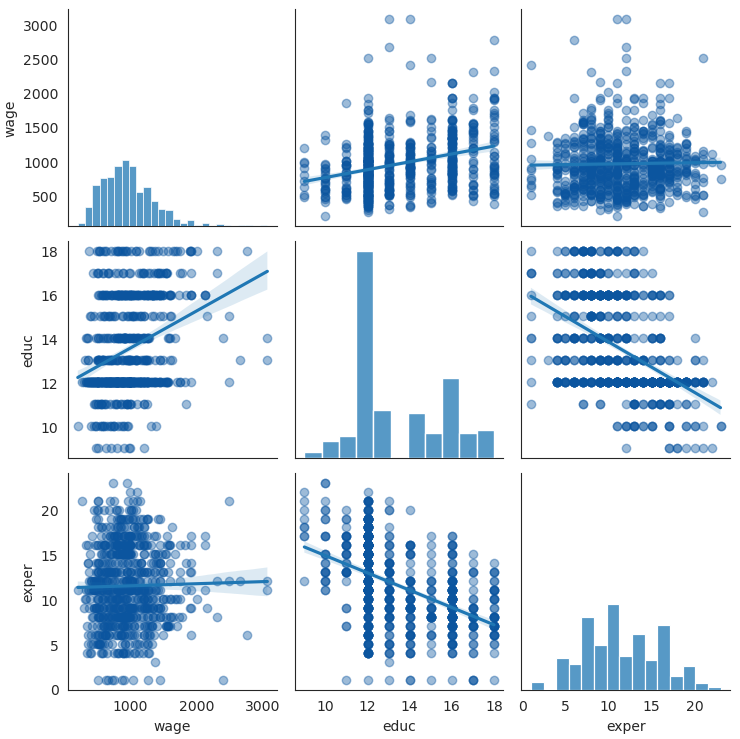

In [954]:

variables=['wage', 'educ', 'exper']
with sns.axes_style('white'):
    g=sns.pairplot(train[variables], kind='reg',
                   plot_kws={'scatter_kws' :{'color': sns.color_palette('Blues')[-1], 'alpha': 0.4}})
plt.tight_layout()

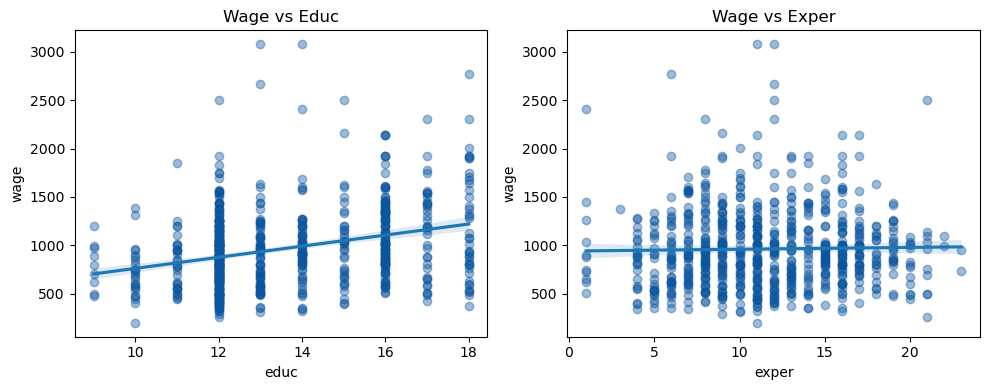

In [955]:
plt.figure(figsize=(10, 4))

# Top-middle: wage vs educ
plt.subplot(1, 2, 1)
sns.regplot(x='educ', y='wage', data=train,
            scatter_kws={'color': sns.color_palette('Blues')[-1], 'alpha': 0.4})
plt.title('Wage vs Educ')

# Top-right: wage vs exper
plt.subplot(1, 2, 2)
sns.regplot(x='exper', y='wage', data=train,
            scatter_kws={'color': sns.color_palette('Blues')[-1], 'alpha': 0.4})
plt.title('Wage vs Exper')

plt.tight_layout()
plt.show()

### LSA 2: Exogeneity

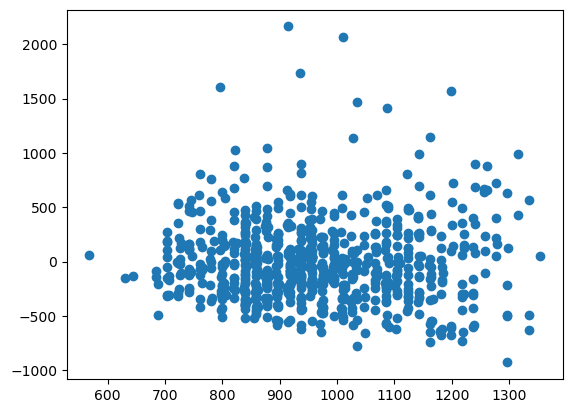

In [957]:
plt.scatter(t2_fit, t2_resid)
plt.show()

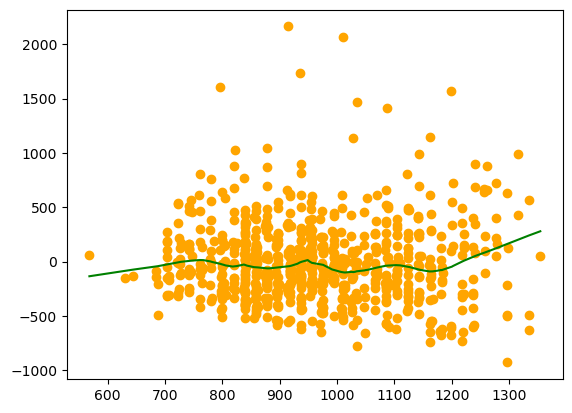

In [958]:
lowess = sm.nonparametric.lowess
plt.scatter(t2_fit, t2_resid, color='orange')
t2_z = lowess(t2_resid, t2_fit, frac=1./5)
plt.plot(t2_z[:,0],t2_z[:,1],'green')
plt.show()

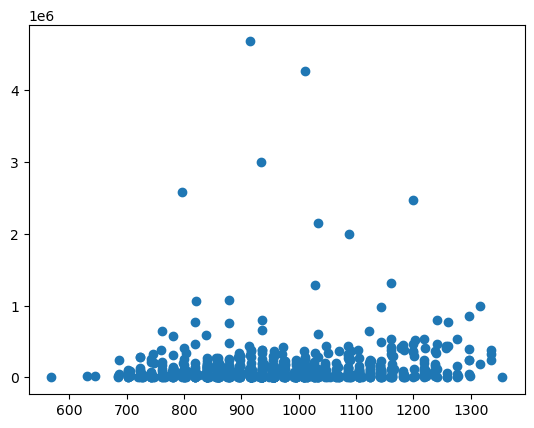

In [959]:
#Squared Residuals for MLR
t2_resid2=t2_reg.resid**2
plt.scatter(t2_fit, t2_resid2)
plt.show()

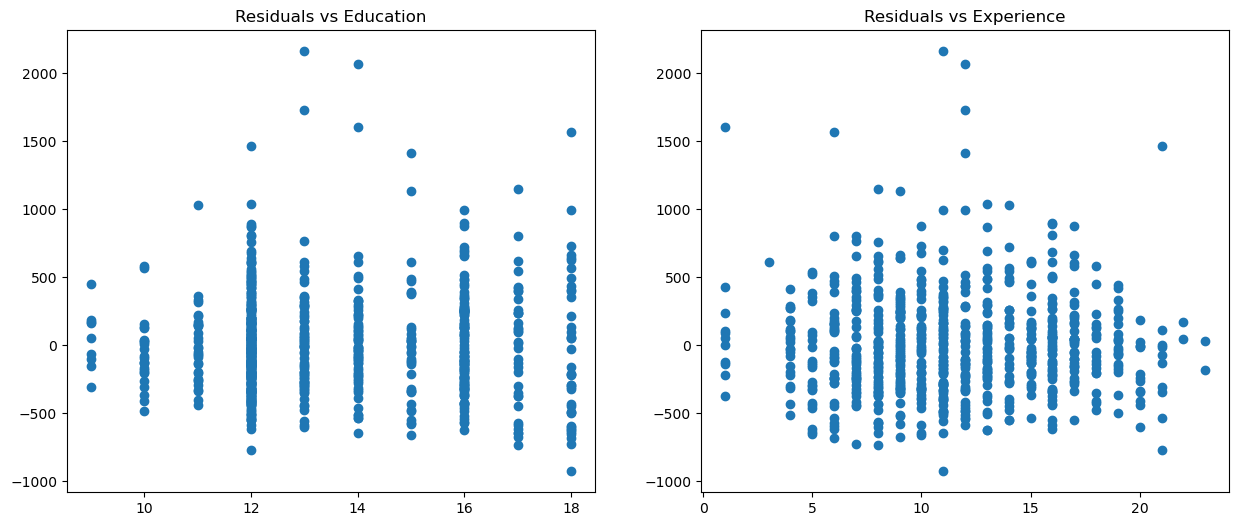

In [960]:
#Residuals against predictors
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(train['educ'], t2_resid)
ax1.set_title("Residuals vs Education")

ax2.scatter(train['exper'], t2_resid)
ax2.set_title("Residuals vs Experience")

plt.show()

### LSA 3: Data is IID

The data represent a cross-sectional survey of income earners, with each row corresponding to a distinct individual. Given that the observations are drawn independently from a population and reflect individual-level attributes, we assume the data satisfy LSA 3, the observations are independent and identically distributed.

### LSA 4: All 4th Moments Exist

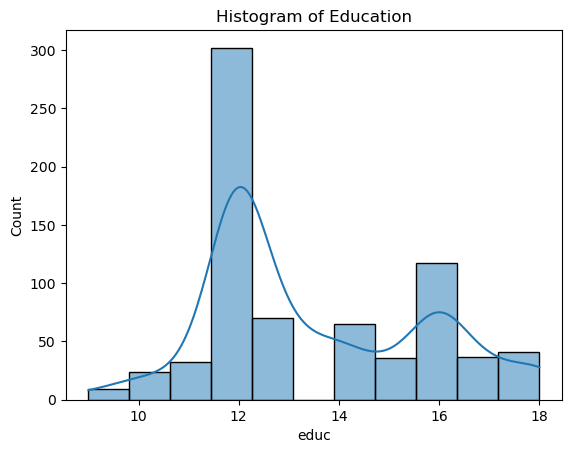

In [964]:
sns.histplot(train['educ'], kde=True)
plt.title("Histogram of Education")
plt.savefig('hist educ.png')
plt.show()

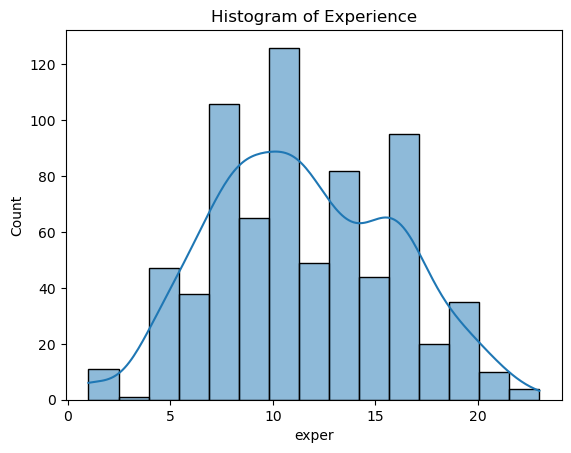

In [965]:
sns.histplot(train['exper'], kde=True)
plt.title("Histogram of Experience")
plt.savefig('hist exper.png')
plt.show()

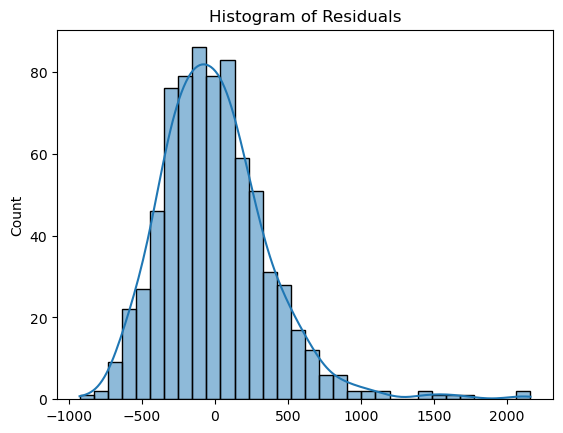

In [966]:
sns.histplot(t2_resid, kde=True)
plt.title("Histogram of Residuals")
plt.show()

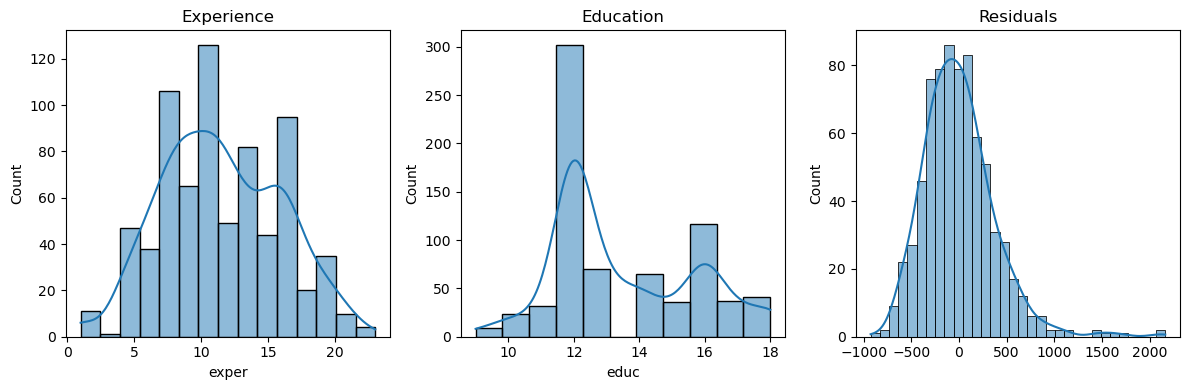

In [967]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns

sns.histplot(train['exper'], kde=True, ax=axes[0])
axes[0].set_title("Experience")

sns.histplot(train['educ'], kde=True, ax=axes[1])
axes[1].set_title("Education")

sns.histplot(t2_resid, kde=True, ax=axes[2])  
axes[2].set_title("Residuals")

plt.tight_layout()
plt.savefig("lsa4_histograms.png", dpi=300, bbox_inches='tight')

### LSA 5: No Perfect Collinearity

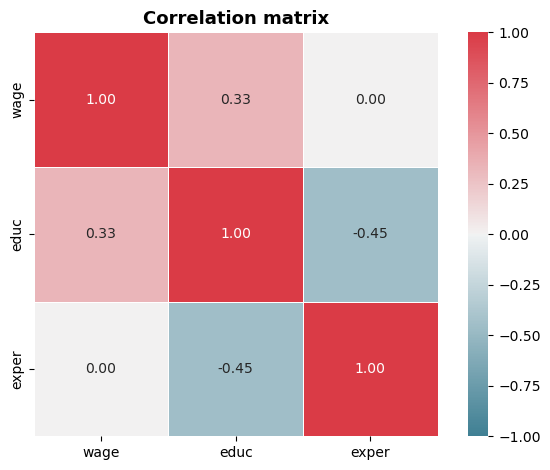

In [969]:
fig, ax = plt.subplots()
variables = ['wage', 'educ', 'exper']
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data[variables].corr(), vmax=1, vmin=-1, center=0, square=True, linewidths=0.5, annot=True, fmt='.2f', ax=ax, cmap=cmap)

ax.set_title('Correlation matrix', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.savefig('correlation matrix.png')
plt.show()

### LSA 6: Homoskedacity

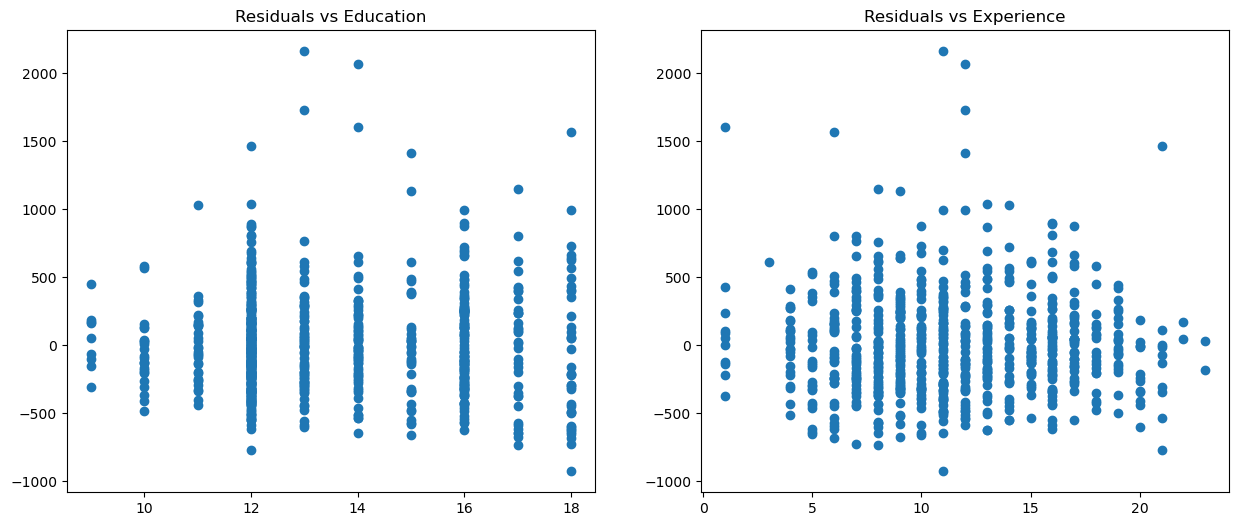

In [971]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(train['educ'], t2_resid)
ax1.set_title('Residuals vs Education')
ax2.scatter(train['exper'], t2_resid)
ax2.set_title('Residuals vs Experience')
plt.savefig('homoskedacity.png')
plt.show()

# **Task 3**

### Relationship between Wage and Education, and Wage and Experience ###

In [974]:
t3_slr_educ_model = smf.ols('wage ~ educ', data=train).fit()
t3_slr_educ_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     78.11
Date:                Wed, 28 May 2025   Prob (F-statistic):           7.21e-18
Time:                        15:44:00   Log-Likelihood:                -5399.0
No. Observations:                 733   AIC:                         1.080e+04
Df Residuals:                     731   BIC:                         1.081e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    188.8699     88.719      2.129      0.034      14.695     363.045
educ          57.3342      6.487      8.838      0.000      44.598      70.070
==============================================================================
Omnibus:                      179.416   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              550.454
Skew:                           1.179   Prob(JB):                    2.95e-120
Kurtosis:                       6.531   Cond. No.                         86.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [975]:
t2_slr_exper_model = smf.ols('wage ~ exper', data=train).fit()
t2_slr_exper_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3188
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.572
Time:                        15:44:00   Log-Likelihood:                -5436.0
No. Observations:                 733   AIC:                         1.088e+04
Df Residuals:                     731   BIC:                         1.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    941.2470     41.168     22.863      0.000     860.425    1022.069
exper          1.8868      3.342      0.565      0.572      -4.673       8.447
==============================================================================
Omnibus:                      186.803   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              509.904
Skew:                           1.275   Prob(JB):                    1.89e-111
Kurtosis:                       6.193   Cond. No.                         34.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [976]:
def forward_selected(data, response, nominated = []):  
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    selected = nominated
    remaining.remove(response)
    remaining ^= set(selected)
    current_score, best_new_score = 0.0, 0.0
    if nominated:
        formula = "{} ~ {} + 1".format(response, ' + '.join(nominated))
        current_score= smf.ols(formula, data).fit().rsquared_adj
        best_new_score = current_score
        print("you nominated variable(s) %s, the adj_r2 is: %f" %(nominated, current_score))
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            print("adding %s increases adj_r2 from %f to %f" %(best_candidate, current_score, best_new_score))
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    print("final model is %s, with adj_r2 of %f" %(formula, model.rsquared_adj))
    return model

In [977]:
df = train[['wage', 'educ', 'exper', 'hours', 'IQ', 'KWW', 'tenure', 'age', 'married', 'black', 'south', 'urban', 'sibs', 'meduc', 'feduc']]

In [978]:
model = forward_selected(df, 'wage')

adding educ increases adj_r2 from 0.000000 to 0.095299
adding KWW increases adj_r2 from 0.095299 to 0.138050
adding urban increases adj_r2 from 0.138050 to 0.161508
adding exper increases adj_r2 from 0.161508 to 0.181577
adding married increases adj_r2 from 0.181577 to 0.198835
adding IQ increases adj_r2 from 0.198835 to 0.215564
adding black increases adj_r2 from 0.215564 to 0.222994
adding tenure increases adj_r2 from 0.222994 to 0.228216
adding hours increases adj_r2 from 0.228216 to 0.230359
adding age increases adj_r2 from 0.230359 to 0.230768
adding south increases adj_r2 from 0.230768 to 0.230818
final model is wage ~ educ + KWW + urban + exper + married + IQ + black + tenure + hours + age + south + 1, with adj_r2 of 0.230818


In [979]:
t3_mlr_model1 = smf.ols(formula='wage ~ exper + educ + KWW', data=train)
t3_mlr1 = t3_mlr_model1.fit(cov_type='HC0')  # robust standard errors
t3_mlr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     38.19
Date:                Wed, 28 May 2025   Prob (F-statistic):           6.27e-23
Time:                        15:44:01   Log-Likelihood:                -5372.1
No. Observations:                 733   AIC:                         1.075e+04
Df Residuals:                     729   BIC:                         1.077e+04
Df Model:                           3                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -355.7322    126.764     -2.806      0.005    -604.185    -107.280
exper         14.9671      3.569      4.194      0.000       7.973      21.962
educ          59.1144      8.289      7.131      0.000      42.867      75.361
KWW            9.7383      2.190      4.448      0.000       5.447      14.030
==============================================================================
Omnibus:                      188.781   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              660.728
Skew:                           1.192   Prob(JB):                    3.35e-144
Kurtosis:                       6.993   Cond. No.                         362.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [980]:
t3_mlr_model1 = smf.ols(formula='wage ~ exper + educ + KWW + urban', data=train)
t3_mlr1 = t3_mlr_model1.fit(cov_type='HC0')  # robust standard errors
t3_mlr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     37.49
Date:                Wed, 28 May 2025   Prob (F-statistic):           1.56e-28
Time:                        15:44:01   Log-Likelihood:                -5360.7
No. Observations:                 733   AIC:                         1.073e+04
Df Residuals:                     728   BIC:                         1.075e+04
Df Model:                           4                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -436.6903    124.972     -3.494      0.000    -681.632    -191.749
exper         15.4144      3.526      4.372      0.000       8.504      22.325
educ          58.6441      8.190      7.161      0.000      42.593      74.696
KWW            9.2361      2.154      4.289      0.000       5.015      13.457
urban        141.9933     27.771      5.113      0.000      87.564     196.423
==============================================================================
Omnibus:                      192.412   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              693.466
Skew:                           1.206   Prob(JB):                    2.60e-151
Kurtosis:                       7.110   Cond. No.                         366.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [981]:
t3_mlr_model2 = smf.ols(formula='wage ~ exper + educ + KWW + urban + married', data=train)
t3_mlr2 = t3_mlr_model2.fit(cov_type='HC0')  # robust standard errors
t3_mlr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     33.41
Date:                Wed, 28 May 2025   Prob (F-statistic):           9.54e-31
Time:                        15:44:01   Log-Likelihood:                -5352.4
No. Observations:                 733   AIC:                         1.072e+04
Df Residuals:                     727   BIC:                         1.074e+04
Df Model:                           5                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -581.3416    129.276     -4.497      0.000    -834.718    -327.966
exper         14.4233      3.516      4.103      0.000       7.533      21.314
educ          60.1865      7.984      7.539      0.000      44.538      75.835
KWW            8.5706      2.132      4.021      0.000       4.393      12.748
urban        146.4248     27.454      5.333      0.000      92.616     200.234
married      175.2809     39.931      4.390      0.000      97.017     253.545
==============================================================================
Omnibus:                      197.420   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.732
Skew:                           1.234   Prob(JB):                    3.13e-157
Kurtosis:                       7.184   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [982]:
t3_mlr_model3 = smf.ols(formula='wage ~ exper + educ + KWW + urban + married + IQ', data=train)
t3_mlr3 = t3_mlr_model3.fit(cov_type='HC0')  # robust standard errors
t3_mlr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     32.64
Date:                Wed, 28 May 2025   Prob (F-statistic):           6.93e-35
Time:                        15:44:01   Log-Likelihood:                -5344.2
No. Observations:                 733   AIC:                         1.070e+04
Df Residuals:                     726   BIC:                         1.073e+04
Df Model:                           6                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -808.5168    133.890     -6.039      0.000   -1070.936    -546.098
exper         14.9968      3.490      4.297      0.000       8.156      21.838
educ          48.9179      8.377      5.840      0.000      32.500      65.336
KWW            6.4979      2.226      2.919      0.004       2.135      10.861
urban        147.7872     27.116      5.450      0.000      94.640     200.934
married      172.6879     39.033      4.424      0.000      96.184     249.191
IQ             4.4011      1.073      4.100      0.000       2.297       6.505
==============================================================================
Omnibus:                      198.529   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              726.188
Skew:                           1.241   Prob(JB):                    2.04e-158
Kurtosis:                       7.198   Cond. No.                     1.14e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [983]:
t3_mlr_model4 = smf.ols(formula='wage ~ exper + educ + KWW + urban + married + IQ + black ', data=train)
t3_mlr4 = t3_mlr_model4.fit(cov_type='HC0')  # robust standard errors
t3_mlr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     31.28
Date:                Wed, 28 May 2025   Prob (F-statistic):           5.68e-38
Time:                        15:44:01   Log-Likelihood:                -5340.2
No. Observations:                 733   AIC:                         1.070e+04
Df Residuals:                     725   BIC:                         1.073e+04
Df Model:                           7                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -688.8312    141.907     -4.854      0.000    -966.964    -410.699
exper         14.9639      3.461      4.323      0.000       8.180      21.748
educ          49.2767      8.361      5.894      0.000      32.890      65.663
KWW            5.8038      2.240      2.591      0.010       1.414      10.194
urban        154.8932     27.187      5.697      0.000     101.608     208.178
married      170.8695     38.357      4.455      0.000      95.692     246.048
IQ             3.5312      1.091      3.236      0.001       1.392       5.670
black       -127.5345     37.357     -3.414      0.001    -200.753     -54.316
==============================================================================
Omnibus:                      199.585   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.710
Skew:                           1.250   Prob(JB):                    4.28e-158
Kurtosis:                       7.180   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [984]:
t3_mlr_model = smf.ols(formula='wage ~ exper + educ + KWW + urban + married + IQ + black + tenure', data=train)
t3_mlr_final = t3_mlr_model.fit(cov_type='HC0')  # robust standard errors
t3_mlr_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     29.21
Date:                Wed, 28 May 2025   Prob (F-statistic):           1.26e-39
Time:                        15:44:01   Log-Likelihood:                -5337.2
No. Observations:                 733   AIC:                         1.069e+04
Df Residuals:                     724   BIC:                         1.073e+04
Df Model:                           8                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -683.0066    141.388     -4.831      0.000    -960.122    -405.891
exper         13.0178      3.588      3.628      0.000       5.985      20.051
educ          48.8057      8.333      5.857      0.000      32.474      65.138
KWW            5.2590      2.257      2.330      0.020       0.835       9.683
urban        157.2883     27.077      5.809      0.000     104.218     210.359
married      165.1190     38.213      4.321      0.000      90.224     240.014
IQ             3.5124      1.087      3.230      0.001       1.381       5.644
black       -124.6535     36.259     -3.438      0.001    -195.719     -53.588
tenure         6.5538      2.783      2.355      0.019       1.099      12.008
==============================================================================
Omnibus:                      214.829   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              821.979
Skew:                           1.332   Prob(JB):                    3.23e-179
Kurtosis:                       7.452   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

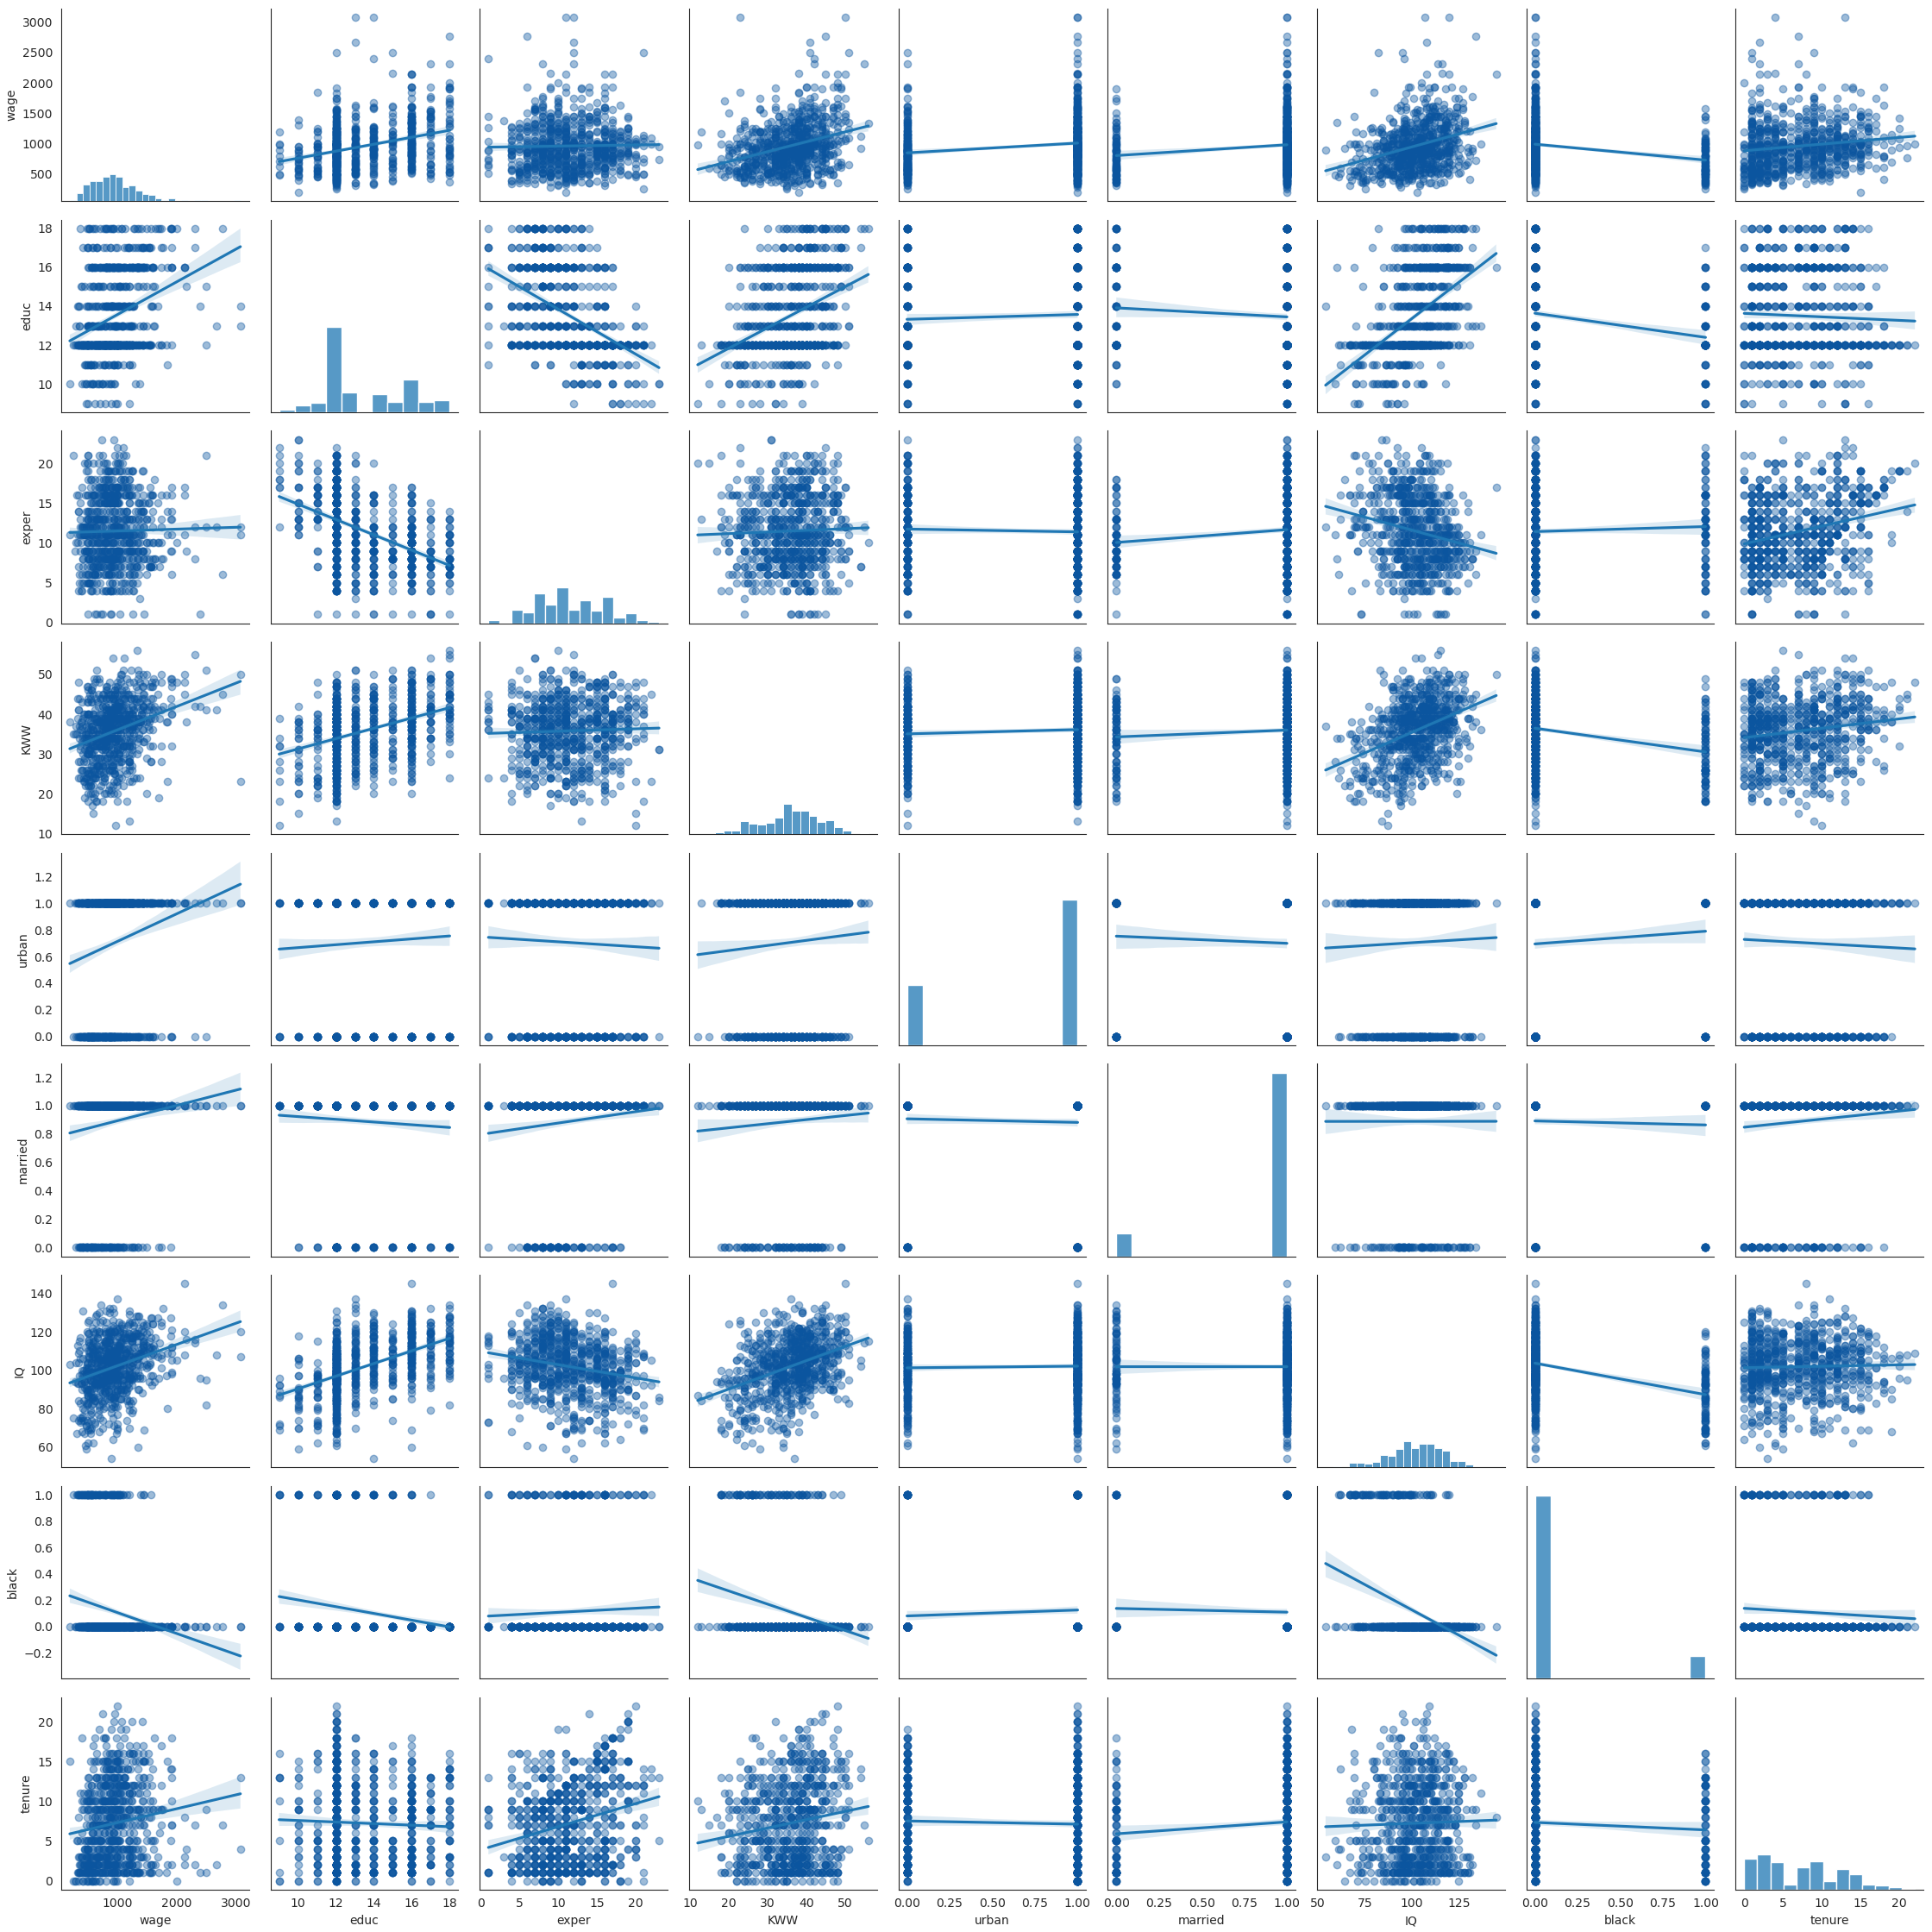

In [985]:
# Variables used in final MLR model
mlr_vars = ['wage', 'educ', 'exper', 'KWW', 'urban', 'married', 'IQ', 'black', 'tenure']

# Pairplot: Visualize scatterplots + trend lines
with sns.axes_style('white'):
    g = sns.pairplot(train[mlr_vars], kind='reg',
                     plot_kws={'scatter_kws': {'color': sns.color_palette('Blues')[-1], 'alpha': 0.4}})
plt.tight_layout()
plt.show()

C:\Users\aiden\AppData\Local\Temp\ipykernel_47236\2546418093.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='urban', y='wage', data=train, palette='Blues')
C:\Users\aiden\AppData\Local\Temp\ipykernel_47236\2546418093.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='married', y='wage', data=train, palette='Blues')
C:\Users\aiden\AppData\Local\Temp\ipykernel_47236\2546418093.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='black', y='wage', data=train, palette='Blues')


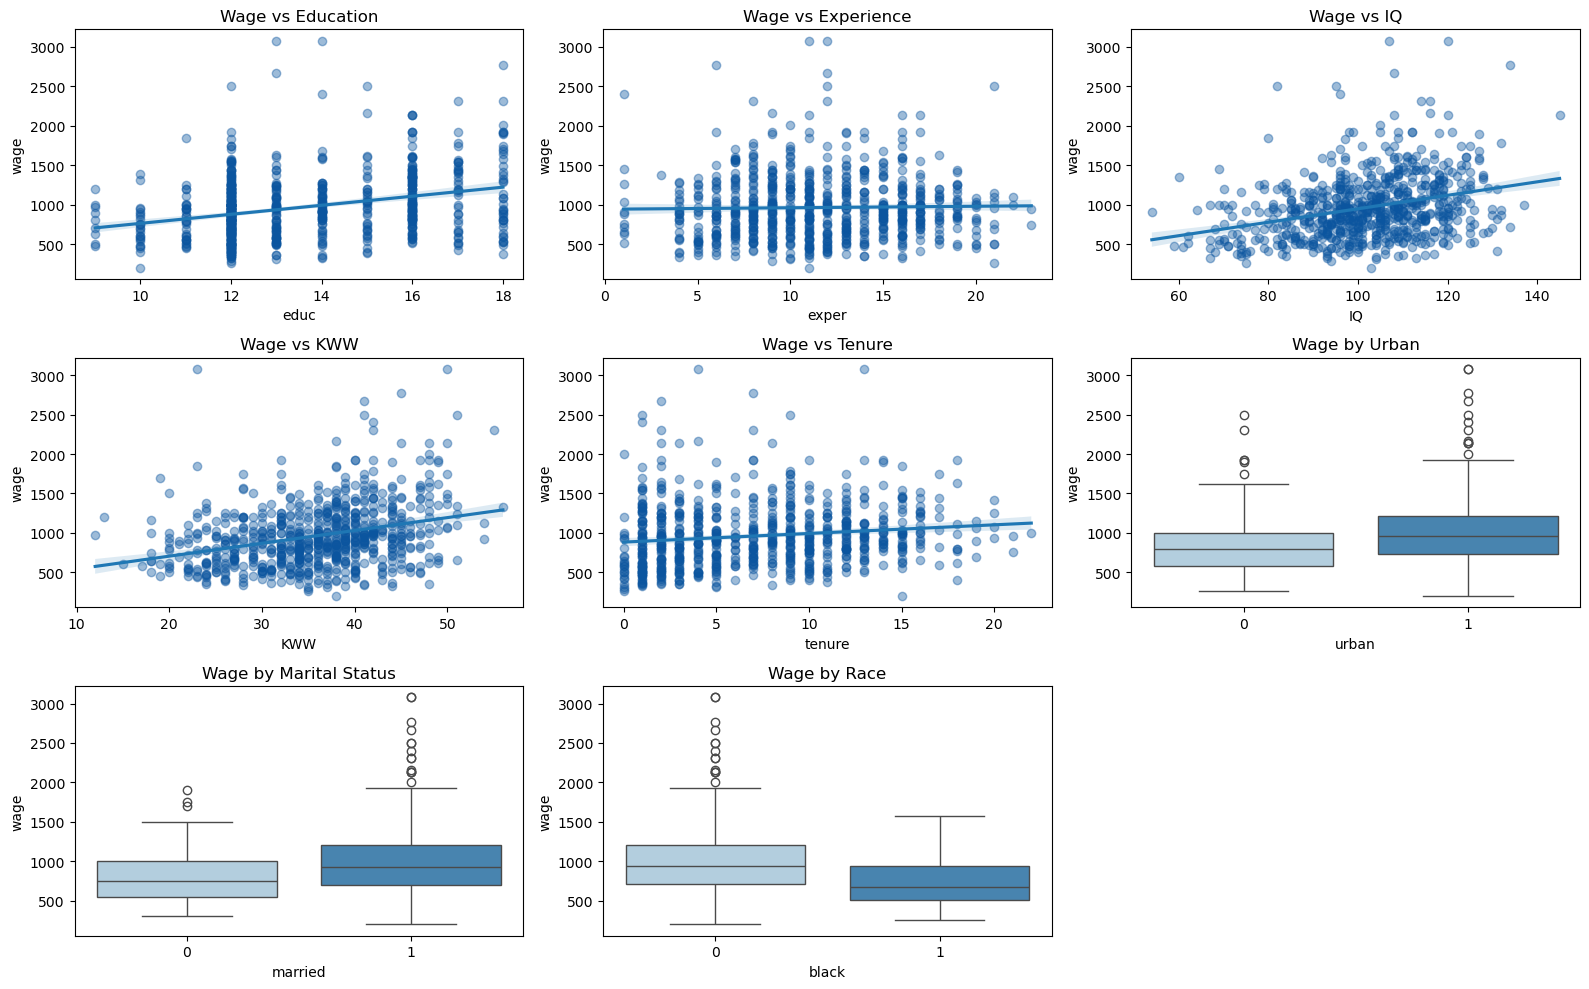

In [986]:
plt.figure(figsize=(16, 10))

# Wage vs Education
plt.subplot(3, 3, 1)
sns.regplot(x='educ', y='wage', data=train,
            scatter_kws={'color': sns.color_palette('Blues')[-1], 'alpha': 0.4})
plt.title('Wage vs Education')

# Wage vs Experience
plt.subplot(3, 3, 2)
sns.regplot(x='exper', y='wage', data=train,
            scatter_kws={'color': sns.color_palette('Blues')[-1], 'alpha': 0.4})
plt.title('Wage vs Experience')

# Wage vs IQ
plt.subplot(3, 3, 3)
sns.regplot(x='IQ', y='wage', data=train,
            scatter_kws={'color': sns.color_palette('Blues')[-1], 'alpha': 0.4})
plt.title('Wage vs IQ')

# Wage vs KWW
plt.subplot(3, 3, 4)
sns.regplot(x='KWW', y='wage', data=train,
            scatter_kws={'color': sns.color_palette('Blues')[-1], 'alpha': 0.4})
plt.title('Wage vs KWW')

# Wage vs Tenure
plt.subplot(3, 3, 5)
sns.regplot(x='tenure', y='wage', data=train,
            scatter_kws={'color': sns.color_palette('Blues')[-1], 'alpha': 0.4})
plt.title('Wage vs Tenure')

# Categorical (urban, married, black) use boxplot instead
plt.subplot(3, 3, 6)
sns.boxplot(x='urban', y='wage', data=train, palette='Blues')
plt.title('Wage by Urban')

plt.subplot(3, 3, 7)
sns.boxplot(x='married', y='wage', data=train, palette='Blues')
plt.title('Wage by Marital Status')

plt.subplot(3, 3, 8)
sns.boxplot(x='black', y='wage', data=train, palette='Blues')
plt.title('Wage by Race')

plt.tight_layout()
plt.show()

### LSA 2: Exogeneity

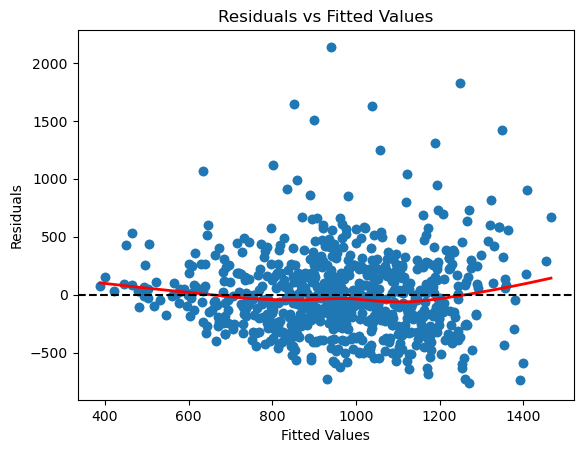

In [988]:
# Scatterplot of residuals vs fitted values
t3_fit = t3_mlr_final.fittedvalues
t3_resid = t3_mlr_final.resid

sns.regplot(x=t3_fit, y=t3_resid, lowess=True,
            scatter_kws={'s': 35, 'alpha': 0.6},
            line_kws={'color': 'red', 'linewidth': 2})
plt.scatter(t3_fit, t3_resid)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

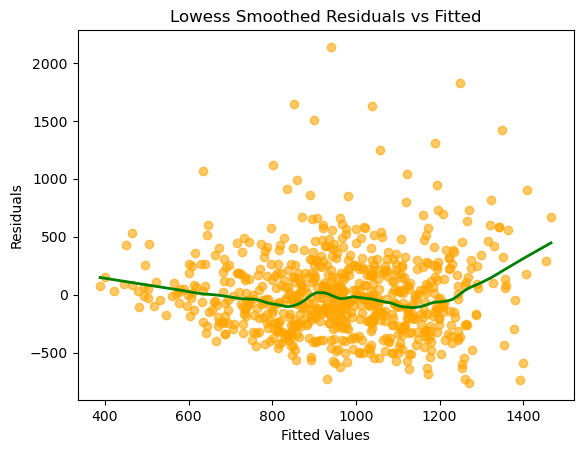

In [989]:
lowess = sm.nonparametric.lowess
plt.scatter(t3_fit, t3_resid, color='orange', alpha=0.6)
t3_z = lowess(t3_resid, t3_fit, frac=1./5)
plt.plot(t3_z[:, 0], t3_z[:, 1], color='green', linewidth=2)
plt.title("Lowess Smoothed Residuals vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

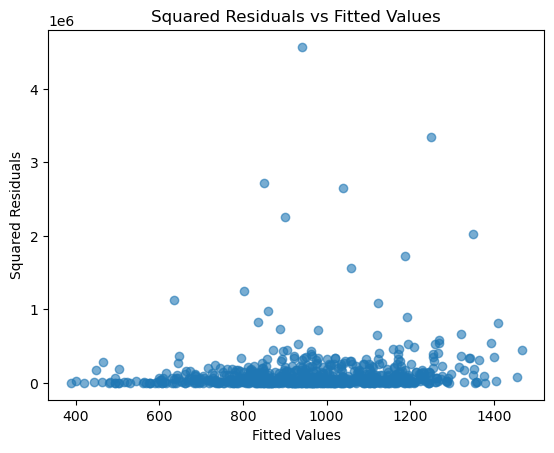

In [990]:
t3_resid2 = t3_resid ** 2

plt.scatter(t3_fit, t3_resid2, alpha=0.6)
plt.title("Squared Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Squared Residuals")
plt.show()

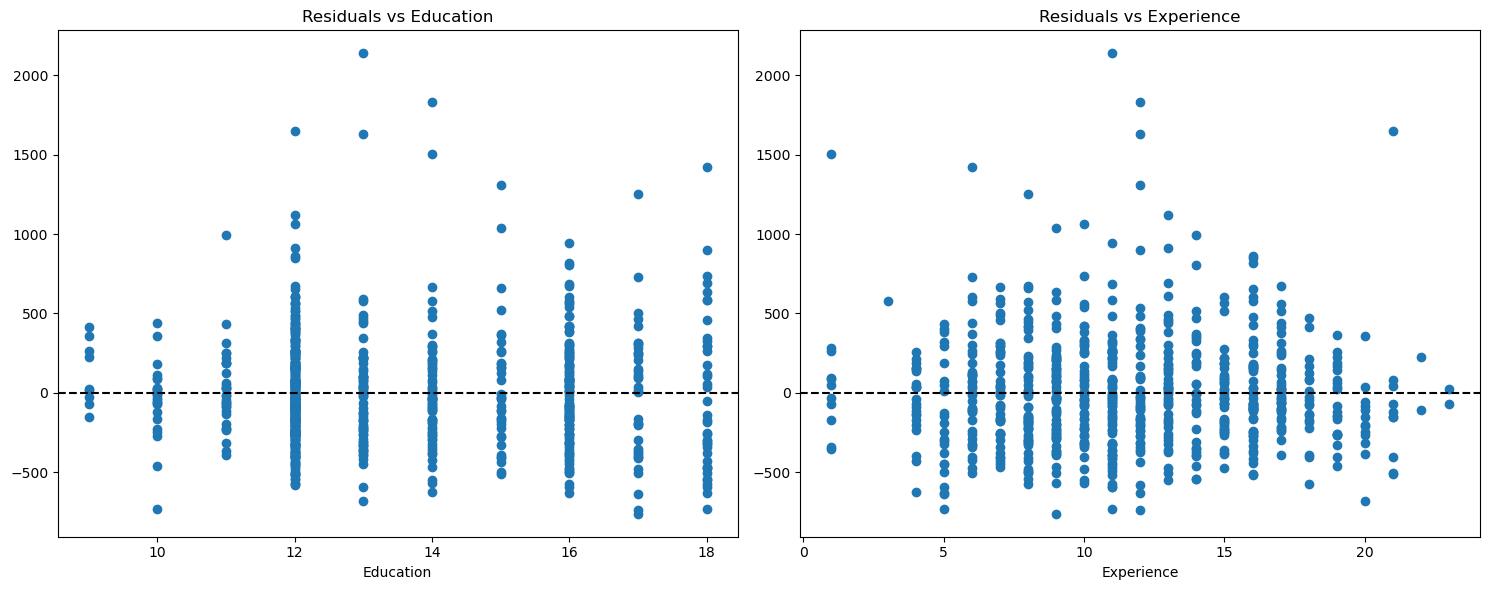

In [991]:
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.scatter(train['educ'], t3_resid)
ax1.axhline(0, color='black', linestyle='--')
ax1.set_title("Residuals vs Education")
ax1.set_xlabel("Education")

ax2.scatter(train['exper'], t3_resid)
ax2.axhline(0, color='black', linestyle='--')
ax2.set_title("Residuals vs Experience")
ax2.set_xlabel("Experience")

plt.tight_layout()
plt.show()

### LSA 5

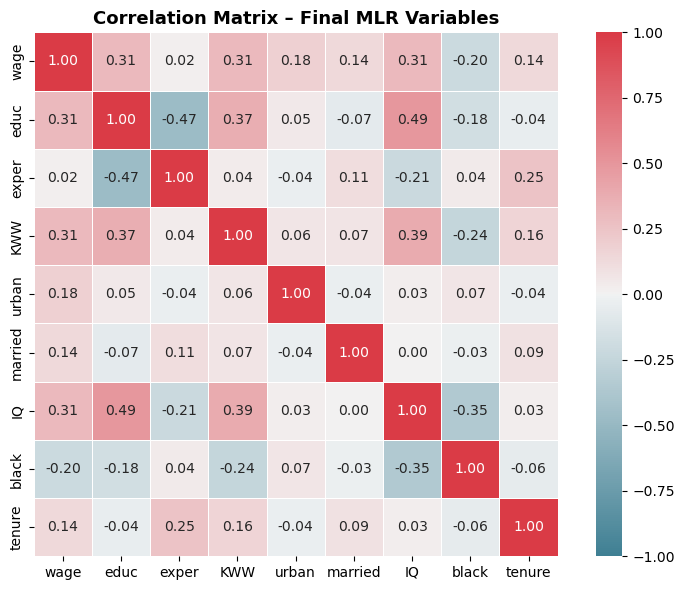

In [993]:
# Variables used in MLR model
mlr_vars = ['wage', 'educ', 'exper', 'KWW', 'urban', 'married', 'IQ', 'black', 'tenure']

# Compute correlation matrix
fig, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(train[mlr_vars].corr(),
            vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.5, annot=True, fmt='.2f',
            cmap=cmap, ax=ax)

ax.set_title('Correlation Matrix – Final MLR Variables', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.savefig('t3_mlr_correlation_matrix.png', dpi=300)
plt.show()

### LSA 6

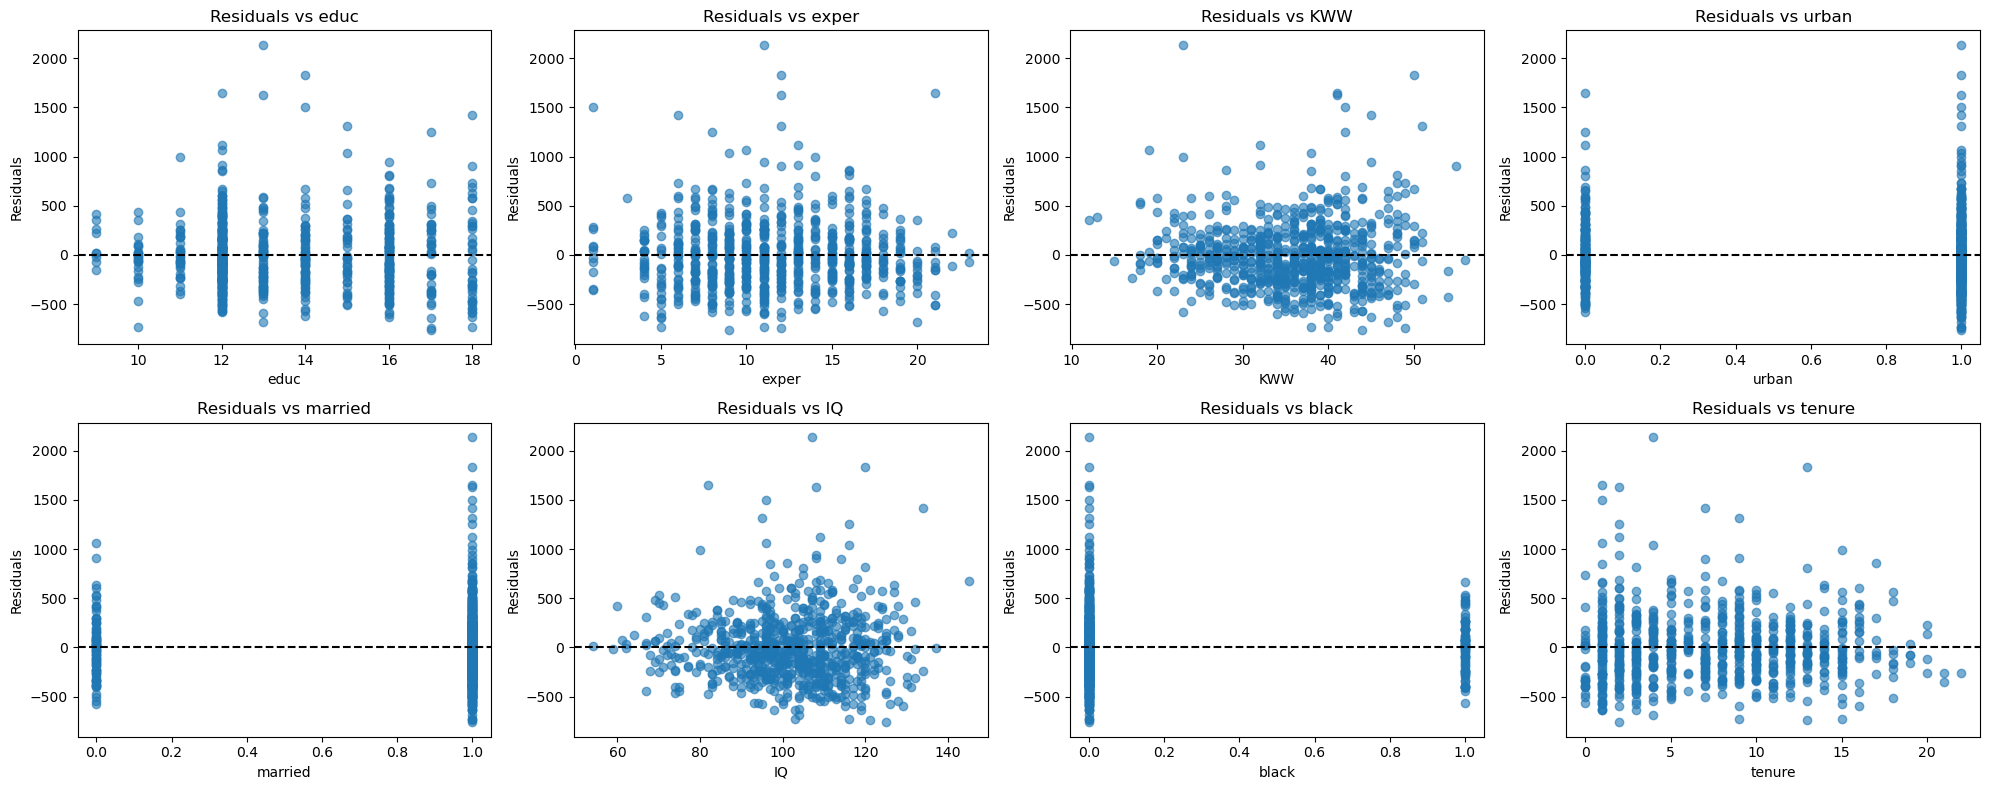

In [995]:
# Residuals from Task 3 model
t3_resid = t3_mlr_final.resid

# Predictor variables from the final model
predictors = ['educ', 'exper', 'KWW', 'urban', 'married', 'IQ', 'black', 'tenure']

# Create subplots: 2 rows × 4 columns for 8 predictors
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

# Loop through variables and create scatter plots
for i, var in enumerate(predictors):
    axes[i].scatter(train[var], t3_resid, alpha=0.6)
    axes[i].axhline(0, color='black', linestyle='--')
    axes[i].set_title(f"Residuals vs {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Residuals")

plt.tight_layout()
plt.savefig("lsa6_residuals_vs_predictors.png", dpi=300)
plt.show()

In [996]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 1. Define your predictor variables
predictors = ['educ', 'exper', 'KWW', 'urban', 'married', 'IQ', 'black', 'tenure']

# 2. Add constant for intercept
X = train[predictors]
X = sm.add_constant(X)

# 3. Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 4. Display the VIF table
print(vif_data)

  Variable         VIF
0    const  116.517412
1     educ    1.811072
2    exper    1.462016
3      KWW    1.378618
4    urban    1.016170
5  married    1.025257
6       IQ    1.536760
7    black    1.172122
8   tenure    1.101848


# **Task 4**

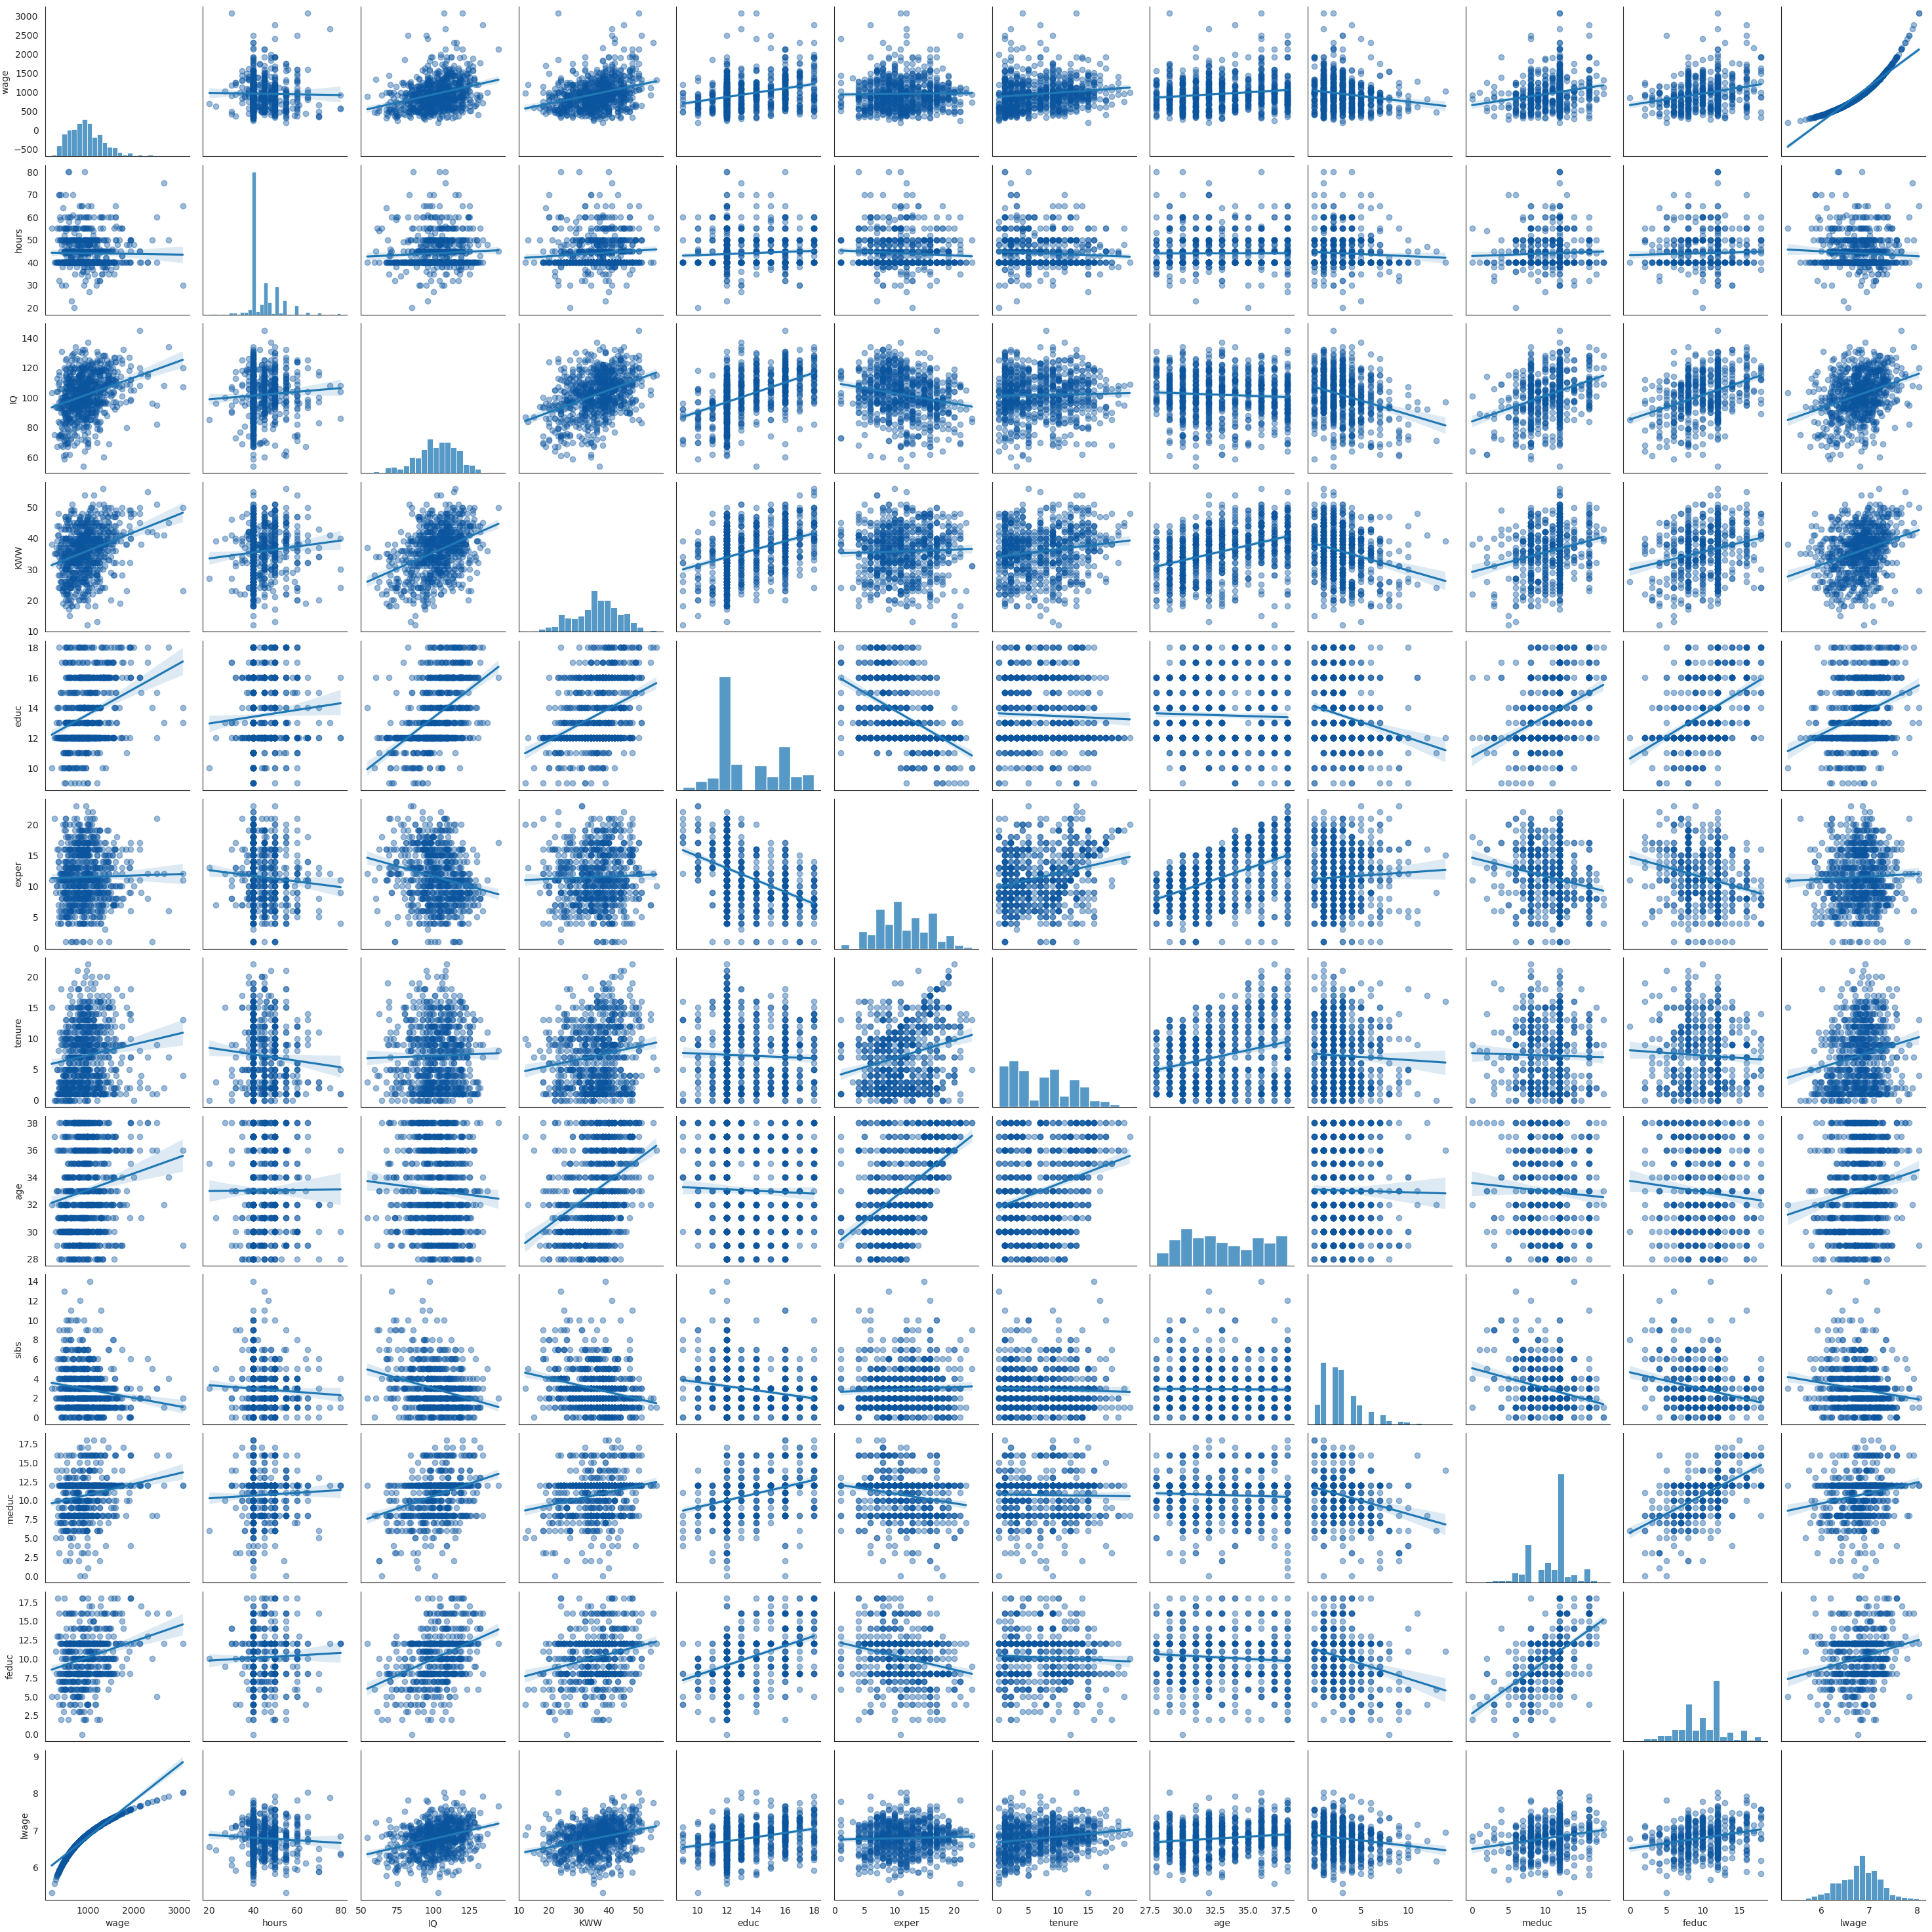

In [998]:
variables=['wage', 'hours', 'IQ', 'KWW', 'educ', 'exper', 'tenure', 'age', 'sibs', 'meduc', 'feduc', 'lwage']
with sns.axes_style('white'):
    g=sns.pairplot(train[variables], kind='reg', 
                   plot_kws={'scatter_kws' :{'color': sns.color_palette('Blues')[-1], 'alpha': 0.4}})

### Model 0 - Base Model

In [1000]:
model = smf.ols('wage ~ educ + exper', data=train).fit(cov_type = 'HC0')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     47.42
Date:                Wed, 28 May 2025   Prob (F-statistic):           4.36e-20
Time:                        15:44:45   Log-Likelihood:                -5384.0
No. Observations:                 733   AIC:                         1.077e+04
Df Residuals:                     730   BIC:                         1.079e+04
Df Model:                           2                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -288.7780    128.375     -2.249      0.024    -540.388     -37.168
educ          76.1294      7.848      9.700      0.000      60.747      91.512
exper         19.4915      3.479      5.603      0.000      12.673      26.310
==============================================================================
Omnibus:                      191.273   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              647.797
Skew:                           1.221   Prob(JB):                    2.15e-141
Kurtosis:                       6.905   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [1001]:
model.mse_resid**0.5

375.5059302119657

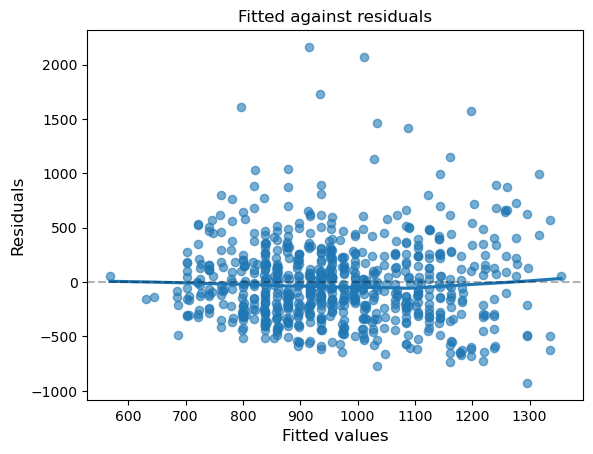

In [1002]:
resid = model.resid
fitted = model.fittedvalues
fig, ax= plt.subplots()
sns.regplot(x=fitted, y=resid, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Fitted values',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('Fitted against residuals')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  
plt.show()

In [1279]:
#Model 0 DFBETA, DFBETAS and Cooks

infl_re = model.get_influence()
hatvals_re = infl_re.hat_matrix_diag    # hat values
t_resid_re = infl_re.resid_studentized_external  # externally Studentised residuals
(c_re, _) = infl_re.cooks_distance    # Cooks distance.
dfbs_re = infl_re.dfbetas              # DFBETAS
(dff_re, dffs_re) = infl_re.dffits     # DFFITS, ignore dffs_re as it is already standardised

# Check if they exceed the thresholds: cook_threshold = 4 / n, dfbetas_threshold = 2 / sqrt(n)
n, p= dfbs_re.shape

cook_threshold = 4/n
dfbetas_threshold = 2/np.sqrt(n)
dffits_threshold = 2*np.sqrt(p)/np.sqrt(n)

cooks_values=np.zeros(n)
for i in range(n):
    if c_re[i] >= cook_threshold:
        cooks_values[i] == 1
    else:
        cooks_values[i] == 0 
flagged_indices_cooks = np.where(cooks_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on Cook's Distance.")
else:
    print("Influential points based on Cook's Distance:")
    print(flagged_indices_cooks)

dfbetas_values = np.zeros(dfbs_re.shape)
for i in range(n):
    for j in range(p):
        if np.abs(dfbs_re[i,j]) >= dfbetas_threshold:
            dfbetas_values[i,j] == 1
        else:
            dfbetas_values[i,j] == 0
flagged_indices_dfb = np.where(dfbetas_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFBETAS.")
else:
    print("Influential points based on DFBETAS:")
    print(flagged_indices_dfb)

dffit_values = np.zeros(n)
for i in range(n):
   if np.abs(dff_re[i]) >= dffits_threshold:
       dffit_values[i] == 1
   else:
        dffit_values[i] == 0
flagged_indices_dff = np.where(dffit_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFFITS.")
else:
    print("Influential points based on DFFITS:")
    print(flagged_indices_dff)

No influential points based on Cook's Distance.
No influential points based on DFBETAS.
No influential points based on DFFITS.




### Model 1 - Increased Number of Variables

In [1005]:
model = smf.ols('wage ~ educ + exper + KWW + urban + married + IQ + black + tenure', data=train).fit(cov_type = 'HC0')
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     29.21
Date:                Wed, 28 May 2025   Prob (F-statistic):           1.26e-39
Time:                        15:44:45   Log-Likelihood:                -5337.2
No. Observations:                 733   AIC:                         1.069e+04
Df Residuals:                     724   BIC:                         1.073e+04
Df Model:                           8                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -683.0066    141.388     -4.831      0.000    -960.122    -405.891
educ          48.8057      8.333      5.857      0.000      32.474      65.138
exper         13.0178      3.588      3.628      0.000       5.985      20.051
KWW            5.2590      2.257      2.330      0.020       0.835       9.683
urban        157.2883     27.077      5.809      0.000     104.218     210.359
married      165.1190     38.213      4.321      0.000      90.224     240.014
IQ             3.5124      1.087      3.230      0.001       1.381       5.644
black       -124.6535     36.259     -3.438      0.001    -195.719     -53.588
tenure         6.5538      2.783      2.355      0.019       1.099      12.008
==============================================================================
Omnibus:                      214.829   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              821.979
Skew:                           1.332   Prob(JB):                    3.23e-179
Kurtosis:                       7.452   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1006]:
model.mse_resid**0.5

353.7382125538841

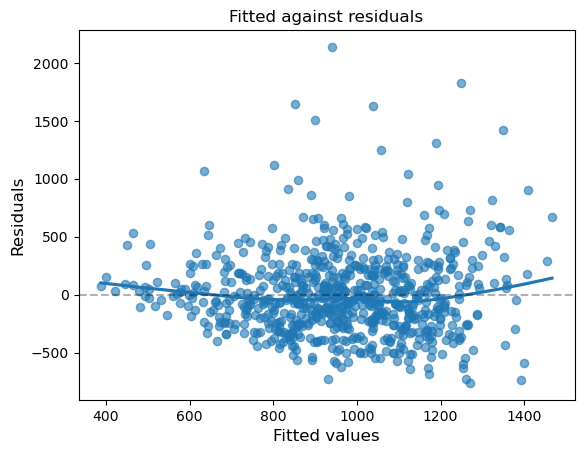

In [1007]:
resid = model.resid
fitted = model.fittedvalues
fig, ax= plt.subplots()
sns.regplot(x=fitted, y=resid, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Fitted values',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('Fitted against residuals')
plt.axhline(color='Black', alpha=0.3, linestyle='--') 
plt.savefig('Model 1 resid') 
plt.show()


In [1277]:
#Model 1 DFBETA, DFBETAS and Cooks

infl_re = model.get_influence()
hatvals_re = infl_re.hat_matrix_diag    # hat values
t_resid_re = infl_re.resid_studentized_external  # externally Studentised residuals
(c_re, _) = infl_re.cooks_distance    # Cooks distance.
dfbs_re = infl_re.dfbetas              # DFBETAS
(dff_re, dffs_re) = infl_re.dffits     # DFFITS, ignore dffs_re as it is already standardised

# Check if they exceed the thresholds: cook_threshold = 4 / n, dfbetas_threshold = 2 / sqrt(n)
n, p= dfbs_re.shape

cook_threshold = 4/n
dfbetas_threshold = 2/np.sqrt(n)
dffits_threshold = 2*np.sqrt(p)/np.sqrt(n)

cooks_values=np.zeros(n)
for i in range(n):
    if c_re[i] >= cook_threshold:
        cooks_values[i] == 1
    else:
        cooks_values[i] == 0 
flagged_indices_cooks = np.where(cooks_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on Cook's Distance.")
else:
    print("Influential points based on Cook's Distance:")
    print(flagged_indices_cooks)

dfbetas_values = np.zeros(dfbs_re.shape)
for i in range(n):
    for j in range(p):
        if np.abs(dfbs_re[i,j]) >= dfbetas_threshold:
            dfbetas_values[i,j] == 1
        else:
            dfbetas_values[i,j] == 0
flagged_indices_dfb = np.where(dfbetas_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFBETAS.")
else:
    print("Influential points based on DFBETAS:")
    print(flagged_indices_dfb)

dffit_values = np.zeros(n)
for i in range(n):
   if np.abs(dff_re[i]) >= dffits_threshold:
       dffit_values[i] == 1
   else:
        dffit_values[i] == 0
flagged_indices_dff = np.where(dffit_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFFITS.")
else:
    print("Influential points based on DFFITS:")
    print(flagged_indices_dff)

No influential points based on Cook's Distance.
No influential points based on DFBETAS.
No influential points based on DFFITS.


In [1009]:
#Potential Interaction effects
educ_IQ = train['educ'] * train['IQ']
educ_KWW = train['educ'] * train['KWW'] #Significant
urban_married = train['urban'] * train['married']
exper_tenure = train['exper'] * train['tenure']
KWW_black = train['KWW'] * train['black']
tenure_married = train['tenure'] * train['married']
black_urban = train['black'] * train['urban']
exper_urban = train['exper'] * train['urban']
exper_black = train['exper'] * train['black']
IQ_urban = train['IQ'] * train['urban']
IQ_married = train['IQ'] * train['married']
IQ_exper = train['IQ'] * train['exper']
IQ_tenure = train['IQ'] * train['tenure']
black_married = train['black'] * train['married']
black_tenure = train['black'] * train['tenure'] #Significant
educ_urban = train['educ'] * train['urban']
educ_black = train['educ'] * train['black']

### Model 2 - Log Wage Base Model

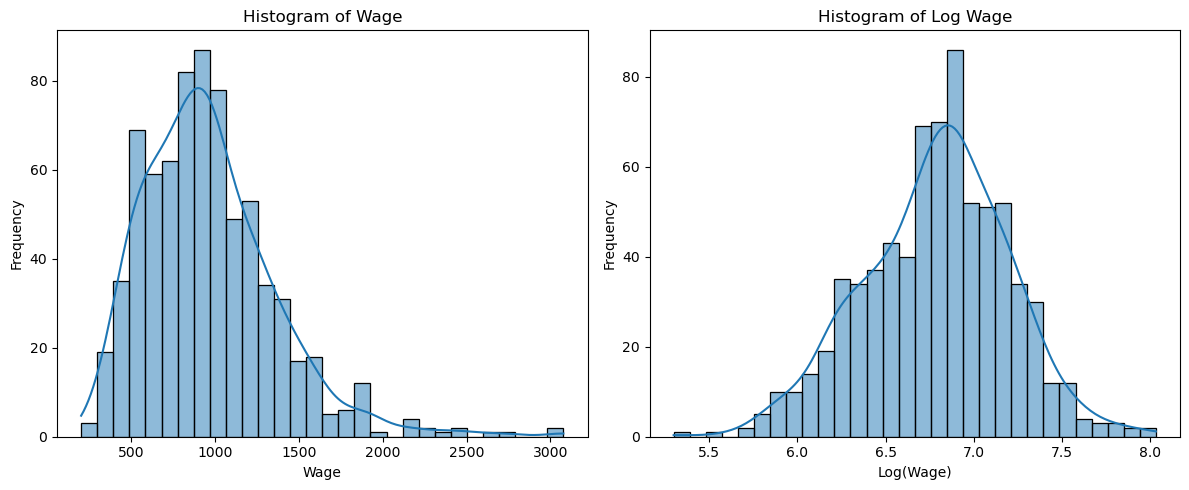

In [1011]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Histogram of Wage
sns.histplot(train['wage'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Wage')
axes[0].set_xlabel('Wage')
axes[0].set_ylabel('Frequency')

# Histogram of Log Wage
sns.histplot(train['lwage'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Log Wage')
axes[1].set_xlabel('Log(Wage)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('Wage_vs_LogWage_Histograms')
plt.show()

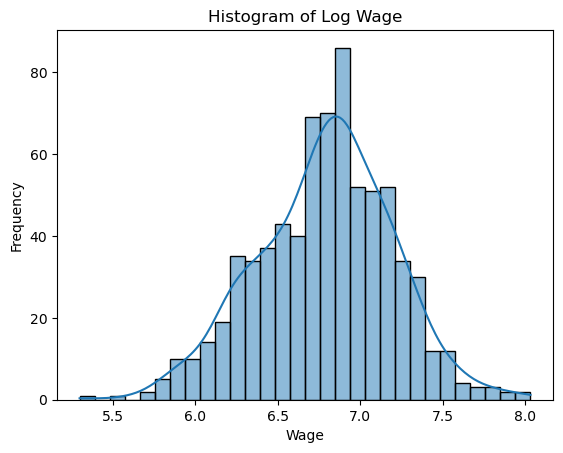

In [1012]:
sns.histplot(train['lwage'], bins=30, kde=True)
plt.title('Histogram of Log Wage')
plt.xlabel('Wage')
plt.ylabel('Frequency')
plt.savefig('Log wage histogram')
plt.show()

In [1013]:
model = smf.ols('lwage ~ educ + exper', data=train).fit(cov_type = 'HC0')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     51.00
Date:                Wed, 28 May 2025   Prob (F-statistic):           1.86e-21
Time:                        15:44:46   Log-Likelihood:                -337.19
No. Observations:                 733   AIC:                             680.4
Df Residuals:                     730   BIC:                             694.2
Df Model:                           2                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4911      0.131     41.800      0.000       5.234       5.749
educ           0.0776      0.008     10.047      0.000       0.062       0.093
exper          0.0216      0.004      5.967      0.000       0.014       0.029
==============================================================================
Omnibus:                        8.335   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.508
Skew:                          -0.219   Prob(JB):                       0.0142
Kurtosis:                       3.296   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [1014]:
model.mse_resid**0.5

0.3840889633330186

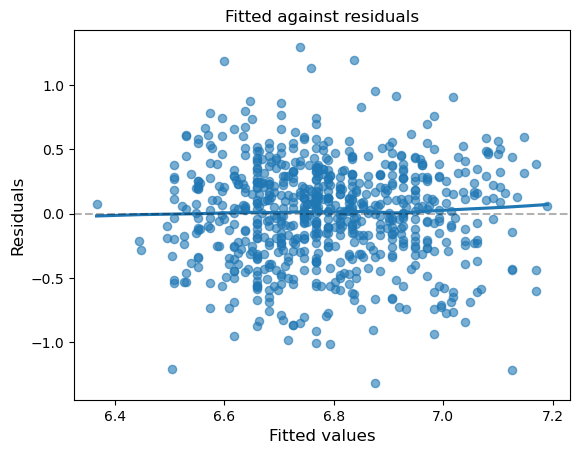

In [1015]:
resid = model.resid
fitted = model.fittedvalues
fig, ax= plt.subplots()
sns.regplot(x=fitted, y=resid, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Fitted values',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('Fitted against residuals')
plt.axhline(color='Black', alpha=0.3, linestyle='--') 
plt.savefig('Model 2 resid') 
plt.show()

In [1275]:
#Model 2 DFBETA, DFBETAS and Cooks

infl_re = model.get_influence()
hatvals_re = infl_re.hat_matrix_diag    # hat values
t_resid_re = infl_re.resid_studentized_external  # externally Studentised residuals
(c_re, _) = infl_re.cooks_distance    # Cooks distance.
dfbs_re = infl_re.dfbetas              # DFBETAS
(dff_re, dffs_re) = infl_re.dffits     # DFFITS, ignore dffs_re as it is already standardised

# Check if they exceed the thresholds: cook_threshold = 4 / n, dfbetas_threshold = 2 / sqrt(n)
n, p= dfbs_re.shape

cook_threshold = 4/n
dfbetas_threshold = 2/np.sqrt(n)
dffits_threshold = 2*np.sqrt(p)/np.sqrt(n)

cooks_values=np.zeros(n)
for i in range(n):
    if c_re[i] >= cook_threshold:
        cooks_values[i] == 1
    else:
        cooks_values[i] == 0 
flagged_indices_cooks = np.where(cooks_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on Cook's Distance.")
else:
    print("Influential points based on Cook's Distance:")
    print(flagged_indices_cooks)

dfbetas_values = np.zeros(dfbs_re.shape)
for i in range(n):
    for j in range(p):
        if np.abs(dfbs_re[i,j]) >= dfbetas_threshold:
            dfbetas_values[i,j] == 1
        else:
            dfbetas_values[i,j] == 0
flagged_indices_dfb = np.where(dfbetas_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFBETAS.")
else:
    print("Influential points based on DFBETAS:")
    print(flagged_indices_dfb)

dffit_values = np.zeros(n)
for i in range(n):
   if np.abs(dff_re[i]) >= dffits_threshold:
       dffit_values[i] == 1
   else:
        dffit_values[i] == 0
flagged_indices_dff = np.where(dffit_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFFITS.")
else:
    print("Influential points based on DFFITS:")
    print(flagged_indices_dff)

No influential points based on Cook's Distance.
No influential points based on DFBETAS.
No influential points based on DFFITS.


### Model 3 - Log Wage Increased Number of Variables

In [1018]:
def forward_selected(data, response, nominated = []):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    selected = nominated
    remaining.remove(response)
    remaining ^= set(selected)
    current_score, best_new_score = 0.0, 0.0
    if nominated:
        formula = "{} ~ {} + 1".format(response, ' + '.join(nominated))
        current_score= smf.ols(formula, data).fit().rsquared_adj
        best_new_score = current_score
        print("you nominated variable(s) %s, the adj_r2 is: %f" %(nominated, current_score))
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            print("adding %s increases adj_r2 from %f to %f" %(best_candidate, current_score, best_new_score))
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    print("final model is %s, with adj_r2 of %f" %(formula, model.rsquared_adj))
    return model

In [1019]:
df = train[['lwage', 'educ', 'exper', 'hours', 'IQ', 'KWW', 'tenure', 'age', 'married', 'black', 'south', 'urban', 'sibs', 'meduc', 'feduc']]

In [1020]:
model = forward_selected(df, 'lwage')

adding IQ increases adj_r2 from 0.000000 to 0.102645
adding tenure increases adj_r2 from 0.102645 to 0.136089
adding urban increases adj_r2 from 0.136089 to 0.171899
adding educ increases adj_r2 from 0.171899 to 0.198809
adding married increases adj_r2 from 0.198809 to 0.224029
adding exper increases adj_r2 from 0.224029 to 0.243531
adding black increases adj_r2 from 0.243531 to 0.257825
adding hours increases adj_r2 from 0.257825 to 0.265998
adding south increases adj_r2 from 0.265998 to 0.268653
adding KWW increases adj_r2 from 0.268653 to 0.271410
adding age increases adj_r2 from 0.271410 to 0.271692
final model is lwage ~ IQ + tenure + urban + educ + married + exper + black + hours + south + KWW + age + 1, with adj_r2 of 0.271692


In [1021]:
model = smf.ols('lwage ~ IQ + tenure + urban + educ + married + exper + black + hours', data=train).fit(cov_type = 'HC0')
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     38.44
Date:                Wed, 28 May 2025   Prob (F-statistic):           4.80e-51
Time:                        15:44:47   Log-Likelihood:                -272.10
No. Observations:                 733   AIC:                             562.2
Df Residuals:                     724   BIC:                             603.6
Df Model:                           8                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2949      0.171     31.038      0.000       4.961       5.629
IQ             0.0046      0.001      4.309      0.000       0.003       0.007
tenure         0.0112      0.003      4.011      0.000       0.006       0.017
urban          0.1835      0.029      6.434      0.000       0.128       0.239
educ           0.0537      0.008      6.450      0.000       0.037       0.070
married        0.2031      0.044      4.627      0.000       0.117       0.289
exper          0.0149      0.004      4.124      0.000       0.008       0.022
black         -0.1845      0.043     -4.260      0.000      -0.269      -0.100
hours         -0.0056      0.002     -2.497      0.013      -0.010      -0.001
==============================================================================
Omnibus:                        7.345   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.025   Jarque-Bera (JB):               10.465
Skew:                           0.004   Prob(JB):                      0.00534
Kurtosis:                       3.585   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1022]:
model.mse_resid**0.5

0.3529096367915573

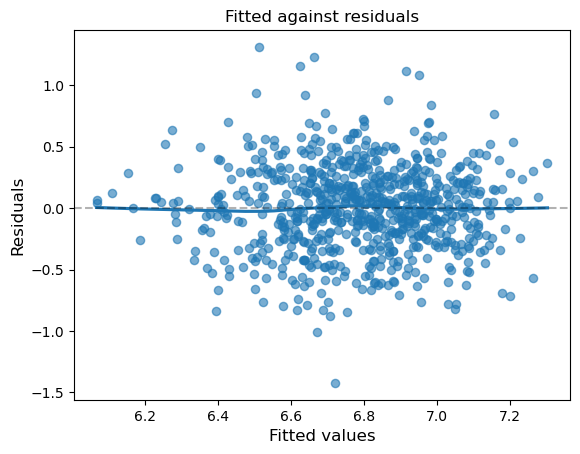

In [1023]:
resid = model.resid
fitted = model.fittedvalues
fig, ax= plt.subplots()
sns.regplot(x=fitted, y=resid, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Fitted values',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('Fitted against residuals')
plt.axhline(color='Black', alpha=0.3, linestyle='--') 
plt.savefig('Model 3 resid') 
plt.show()

In [1273]:
#Model 3 DFBETA, DFBETAS and Cooks

infl_re = model.get_influence()
hatvals_re = infl_re.hat_matrix_diag    # hat values
t_resid_re = infl_re.resid_studentized_external  # externally Studentised residuals
(c_re, _) = infl_re.cooks_distance    # Cooks distance.
dfbs_re = infl_re.dfbetas              # DFBETAS
(dff_re, dffs_re) = infl_re.dffits     # DFFITS, ignore dffs_re as it is already standardised

# Check if they exceed the thresholds: cook_threshold = 4 / n, dfbetas_threshold = 2 / sqrt(n)
n, p= dfbs_re.shape

cook_threshold = 4/n
dfbetas_threshold = 2/np.sqrt(n)
dffits_threshold = 2*np.sqrt(p)/np.sqrt(n)

cooks_values=np.zeros(n)
for i in range(n):
    if c_re[i] >= cook_threshold:
        cooks_values[i] == 1
    else:
        cooks_values[i] == 0 
flagged_indices_cooks = np.where(cooks_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on Cook's Distance.")
else:
    print("Influential points based on Cook's Distance:")
    print(flagged_indices_cooks)

dfbetas_values = np.zeros(dfbs_re.shape)
for i in range(n):
    for j in range(p):
        if np.abs(dfbs_re[i,j]) >= dfbetas_threshold:
            dfbetas_values[i,j] == 1
        else:
            dfbetas_values[i,j] == 0
flagged_indices_dfb = np.where(dfbetas_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFBETAS.")
else:
    print("Influential points based on DFBETAS:")
    print(flagged_indices_dfb)

dffit_values = np.zeros(n)
for i in range(n):
   if np.abs(dff_re[i]) >= dffits_threshold:
       dffit_values[i] == 1
   else:
        dffit_values[i] == 0
flagged_indices_dff = np.where(dffit_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFFITS.")
else:
    print("Influential points based on DFFITS:")
    print(flagged_indices_dff)

No influential points based on Cook's Distance.
No influential points based on DFBETAS.
No influential points based on DFFITS.


### Model 4 - Log Model with Interaction Effects

In [1026]:
model = smf.ols('lwage ~ IQ + tenure + urban + educ + married + exper + black + hours + educ_IQ', data=train).fit(cov_type = 'HC0')
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     35.89
Date:                Wed, 28 May 2025   Prob (F-statistic):           1.38e-52
Time:                        15:44:48   Log-Likelihood:                -272.06
No. Observations:                 733   AIC:                             564.1
Df Residuals:                     723   BIC:                             610.1
Df Model:                           9                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4697      0.617      8.861      0.000       4.260       6.680
IQ             0.0029      0.006      0.499      0.618      -0.009       0.015
tenure         0.0113      0.003      4.011      0.000       0.006       0.017
urban          0.1841      0.029      6.411      0.000       0.128       0.240
educ           0.0403      0.047      0.853      0.393      -0.052       0.133
married        0.2036      0.044      4.634      0.000       0.117       0.290
exper          0.0148      0.004      4.097      0.000       0.008       0.022
black         -0.1856      0.043     -4.273      0.000      -0.271      -0.100
hours         -0.0056      0.002     -2.496      0.013      -0.010      -0.001
educ_IQ        0.0001      0.000      0.281      0.779      -0.001       0.001
==============================================================================
Omnibus:                        7.459   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.024   Jarque-Bera (JB):               10.679
Skew:                           0.005   Prob(JB):                      0.00480
Kurtosis:                       3.591   Cond. No.                     7.03e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 7.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1027]:
model.mse_resid**0.5

0.35313376418853243

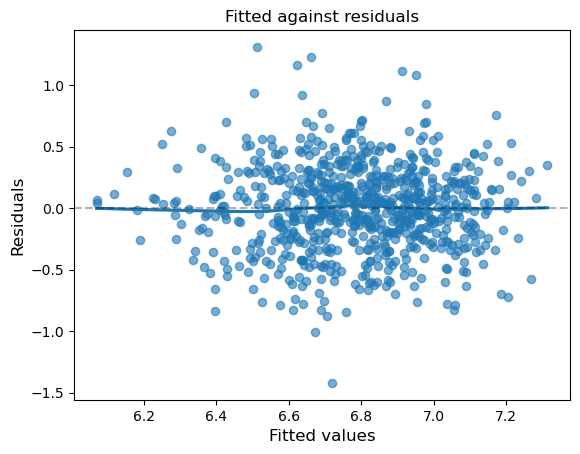

In [1028]:
resid = model.resid
fitted = model.fittedvalues
fig, ax= plt.subplots()
sns.regplot(x=fitted, y=resid, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Fitted values',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('Fitted against residuals')
plt.axhline(color='Black', alpha=0.3, linestyle='--') 
plt.savefig('Model 4 resid') 
plt.show()

In [1271]:
#Model 4 DFBETA, DFBETAS and Cooks

infl_re = model.get_influence()
hatvals_re = infl_re.hat_matrix_diag    # hat values
t_resid_re = infl_re.resid_studentized_external  # externally Studentised residuals
(c_re, _) = infl_re.cooks_distance    # Cooks distance.
dfbs_re = infl_re.dfbetas              # DFBETAS
(dff_re, dffs_re) = infl_re.dffits     # DFFITS, ignore dffs_re as it is already standardised

# Check if they exceed the thresholds: cook_threshold = 4 / n, dfbetas_threshold = 2 / sqrt(n)
n, p= dfbs_re.shape

cook_threshold = 4/n
dfbetas_threshold = 2/np.sqrt(n)
dffits_threshold = 2*np.sqrt(p)/np.sqrt(n)

cooks_values=np.zeros(n)
for i in range(n):
    if c_re[i] >= cook_threshold:
        cooks_values[i] == 1
    else:
        cooks_values[i] == 0 
flagged_indices_cooks = np.where(cooks_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on Cook's Distance.")
else:
    print("Influential points based on Cook's Distance:")
    print(flagged_indices_cooks)

dfbetas_values = np.zeros(dfbs_re.shape)
for i in range(n):
    for j in range(p):
        if np.abs(dfbs_re[i,j]) >= dfbetas_threshold:
            dfbetas_values[i,j] == 1
        else:
            dfbetas_values[i,j] == 0
flagged_indices_dfb = np.where(dfbetas_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFBETAS.")
else:
    print("Influential points based on DFBETAS:")
    print(flagged_indices_dfb)

dffit_values = np.zeros(n)
for i in range(n):
   if np.abs(dff_re[i]) >= dffits_threshold:
       dffit_values[i] == 1
   else:
        dffit_values[i] == 0
flagged_indices_dff = np.where(dffit_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFFITS.")
else:
    print("Influential points based on DFFITS:")
    print(flagged_indices_dff)

No influential points based on Cook's Distance.
No influential points based on DFBETAS.
No influential points based on DFFITS.


### Model 5 - Log Model with Interaction Effect

In [1031]:
model = smf.ols('lwage ~ IQ + tenure + urban + educ + married + exper + black + hours + black_tenure', data=train).fit(cov_type = 'HC0')
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     34.42
Date:                Wed, 28 May 2025   Prob (F-statistic):           1.23e-50
Time:                        15:44:49   Log-Likelihood:                -269.74
No. Observations:                 733   AIC:                             559.5
Df Residuals:                     723   BIC:                             605.4
Df Model:                           9                                         
Covariance Type:                  HC0                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.3145      0.171     31.027      0.000       4.979       5.650
IQ               0.0046      0.001      4.286      0.000       0.002       0.007
tenure           0.0094      0.003      3.205      0.001       0.004       0.015
urban            0.1831      0.028      6.443      0.000       0.127       0.239
educ             0.0536      0.008      6.490      0.000       0.037       0.070
married          0.1962      0.044      4.460      0.000       0.110       0.282
exper            0.0151      0.004      4.210      0.000       0.008       0.022
black           -0.3063      0.075     -4.100      0.000      -0.453      -0.160
hours           -0.0055      0.002     -2.457      0.014      -0.010      -0.001
black_tenure     0.0186      0.008      2.448      0.014       0.004       0.034
==============================================================================
Omnibus:                        7.241   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.027   Jarque-Bera (JB):               10.265
Skew:                           0.007   Prob(JB):                      0.00590
Kurtosis:                       3.580   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1032]:
model.mse_resid**0.5

0.35201504549689316

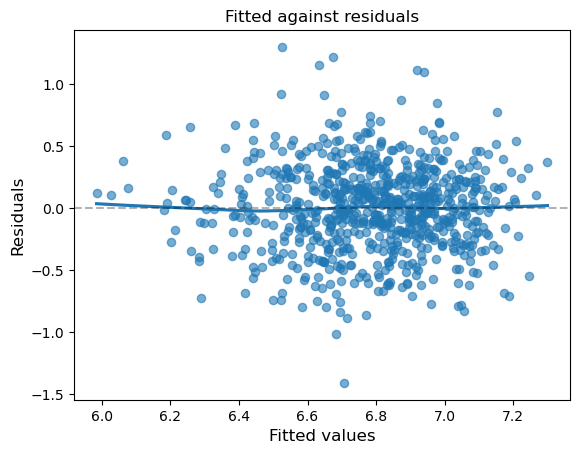

In [1033]:
resid = model.resid
fitted = model.fittedvalues
fig, ax= plt.subplots()
sns.regplot(x=fitted, y=resid, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Fitted values',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('Fitted against residuals')
plt.axhline(color='Black', alpha=0.3, linestyle='--') 
plt.savefig('Model 5 resid') 
plt.show()

In [1269]:
#Model 5 DFBETA, DFBETAS and Cooks

infl_re = model.get_influence()
hatvals_re = infl_re.hat_matrix_diag    # hat values
t_resid_re = infl_re.resid_studentized_external  # externally Studentised residuals
(c_re, _) = infl_re.cooks_distance    # Cooks distance.
dfbs_re = infl_re.dfbetas              # DFBETAS
(dff_re, dffs_re) = infl_re.dffits     # DFFITS, ignore dffs_re as it is already standardised

# Check if they exceed the thresholds: cook_threshold = 4 / n, dfbetas_threshold = 2 / sqrt(n)
n, p= dfbs_re.shape

cook_threshold = 4/n
dfbetas_threshold = 2/np.sqrt(n)
dffits_threshold = 2*np.sqrt(p)/np.sqrt(n)

cooks_values=np.zeros(n)
for i in range(n):
    if c_re[i] >= cook_threshold:
        cooks_values[i] == 1
    else:
        cooks_values[i] == 0 
flagged_indices_cooks = np.where(cooks_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on Cook's Distance.")
else:
    print("Influential points based on Cook's Distance:")
    print(flagged_indices_cooks)

dfbetas_values = np.zeros(dfbs_re.shape)
for i in range(n):
    for j in range(p):
        if np.abs(dfbs_re[i,j]) >= dfbetas_threshold:
            dfbetas_values[i,j] == 1
        else:
            dfbetas_values[i,j] == 0
flagged_indices_dfb = np.where(dfbetas_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFBETAS.")
else:
    print("Influential points based on DFBETAS:")
    print(flagged_indices_dfb)

dffit_values = np.zeros(n)
for i in range(n):
   if np.abs(dff_re[i]) >= dffits_threshold:
       dffit_values[i] == 1
   else:
        dffit_values[i] == 0
flagged_indices_dff = np.where(dffit_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFFITS.")
else:
    print("Influential points based on DFFITS:")
    print(flagged_indices_dff)

No influential points based on Cook's Distance.
No influential points based on DFBETAS.
No influential points based on DFFITS.


### Model 6 - Log Model with Spline KWW

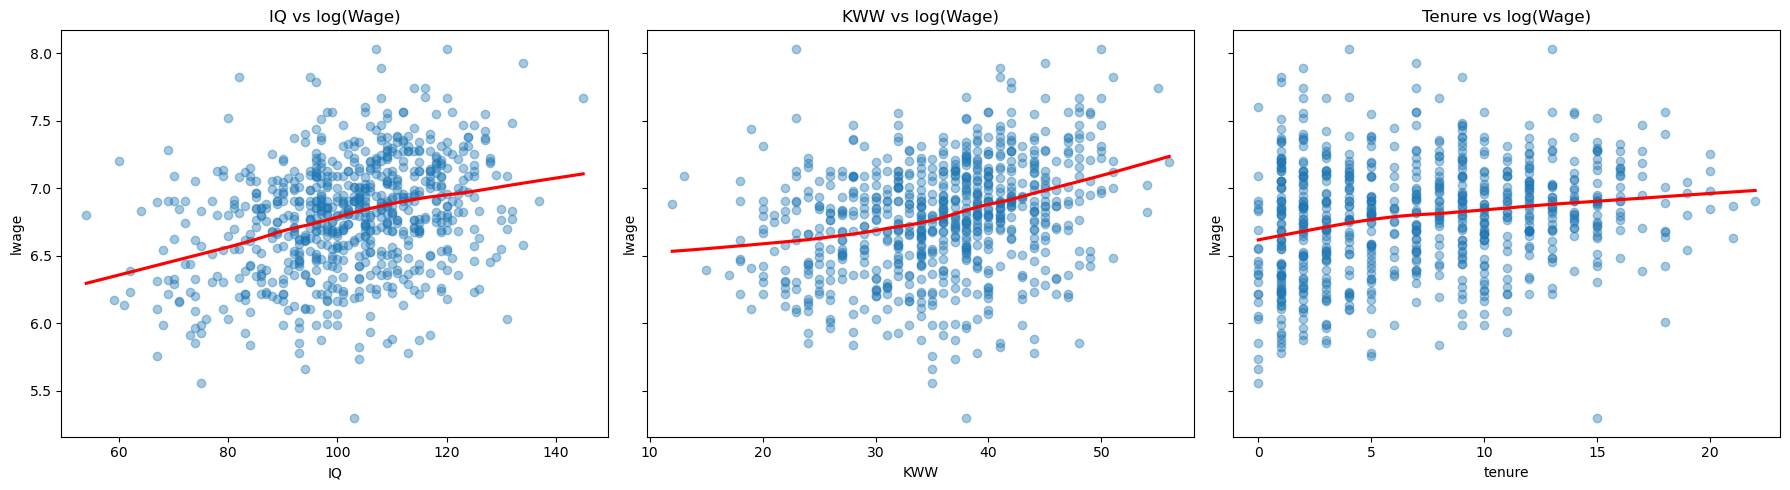

In [1036]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# IQ vs lwage with LOWESS
sns.regplot(data=train, x='IQ', y='lwage', ax=axes[0], lowess=True,
            scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
axes[0].set_title('IQ vs log(Wage)')

# KWW vs lwage with LOWESS
sns.regplot(data=train, x='KWW', y='lwage', ax=axes[1], lowess=True,
            scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
axes[1].set_title('KWW vs log(Wage)')

# Tenure vs lwage with LOWESS
sns.regplot(data=train, x='tenure', y='lwage', ax=axes[2], lowess=True,
            scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
axes[2].set_title('Tenure vs log(Wage)')

# Layout adjustment
plt.tight_layout()
plt.savefig('non-linearity')
plt.show()

In [1037]:
xi = 34

# Create the spline variable (positive part only)
train['KWW_step'] = (train['KWW'] > xi) * (train['KWW'] - xi)

In [1038]:
model = smf.ols('lwage ~ IQ + tenure + urban + educ + married + exper + black + hours + KWW + KWW_step', data=train).fit(cov_type = 'HC0')
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     33.14
Date:                Wed, 28 May 2025   Prob (F-statistic):           4.41e-53
Time:                        15:44:50   Log-Likelihood:                -265.37
No. Observations:                 733   AIC:                             552.7
Df Residuals:                     722   BIC:                             603.3
Df Model:                          10                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6399      0.196     28.805      0.000       5.256       6.024
IQ             0.0043      0.001      3.989      0.000       0.002       0.006
tenure         0.0100      0.003      3.511      0.000       0.004       0.016
urban          0.1773      0.028      6.284      0.000       0.122       0.233
educ           0.0462      0.009      5.301      0.000       0.029       0.063
married        0.2013      0.043      4.731      0.000       0.118       0.285
exper          0.0127      0.004      3.467      0.001       0.006       0.020
black         -0.1886      0.045     -4.168      0.000      -0.277      -0.100
hours         -0.0061      0.002     -2.806      0.005      -0.010      -0.002
KWW           -0.0063      0.004     -1.638      0.101      -0.014       0.001
KWW_step       0.0186      0.006      3.117      0.002       0.007       0.030
==============================================================================
Omnibus:                        7.042   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                9.580
Skew:                          -0.055   Prob(JB):                      0.00831
Kurtosis:                       3.549   Cond. No.                     1.78e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1039]:
model.mse_resid**0.5

0.35016607066157124

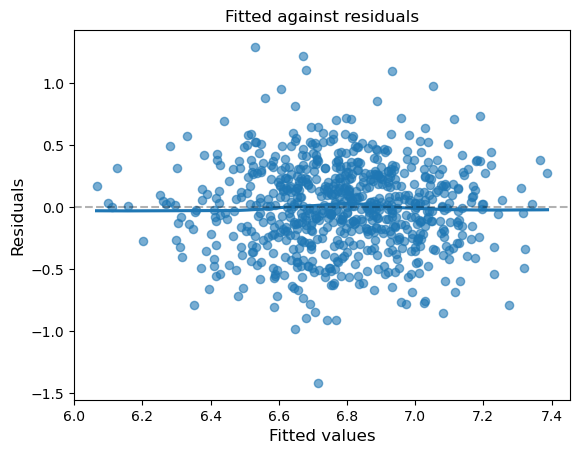

In [1040]:
resid = model.resid
fitted = model.fittedvalues
fig, ax= plt.subplots()
sns.regplot(x=fitted, y=resid, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Fitted values',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('Fitted against residuals')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  
plt.savefig('Model 6 resid')
plt.show()

In [1267]:
#Model 6 DFBETA, DFBETAS and Cooks

infl_re = model.get_influence()
hatvals_re = infl_re.hat_matrix_diag    # hat values
t_resid_re = infl_re.resid_studentized_external  # externally Studentised residuals
(c_re, _) = infl_re.cooks_distance    # Cooks distance.
dfbs_re = infl_re.dfbetas              # DFBETAS
(dff_re, dffs_re) = infl_re.dffits     # DFFITS, ignore dffs_re as it is already standardised

# Check if they exceed the thresholds: cook_threshold = 4 / n, dfbetas_threshold = 2 / sqrt(n)
n, p= dfbs_re.shape

cook_threshold = 4/n
dfbetas_threshold = 2/np.sqrt(n)
dffits_threshold = 2*np.sqrt(p)/np.sqrt(n)

cooks_values=np.zeros(n)
for i in range(n):
    if c_re[i] >= cook_threshold:
        cooks_values[i] == 1
    else:
        cooks_values[i] == 0 
flagged_indices_cooks = np.where(cooks_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on Cook's Distance.")
else:
    print("Influential points based on Cook's Distance:")
    print(flagged_indices_cooks)

dfbetas_values = np.zeros(dfbs_re.shape)
for i in range(n):
    for j in range(p):
        if np.abs(dfbs_re[i,j]) >= dfbetas_threshold:
            dfbetas_values[i,j] == 1
        else:
            dfbetas_values[i,j] == 0
flagged_indices_dfb = np.where(dfbetas_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFBETAS.")
else:
    print("Influential points based on DFBETAS:")
    print(flagged_indices_dfb)

dffit_values = np.zeros(n)
for i in range(n):
   if np.abs(dff_re[i]) >= dffits_threshold:
       dffit_values[i] == 1
   else:
        dffit_values[i] == 0
flagged_indices_dff = np.where(dffit_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFFITS.")
else:
    print("Influential points based on DFFITS:")
    print(flagged_indices_dff)

No influential points based on Cook's Distance.
No influential points based on DFBETAS.
No influential points based on DFFITS.


### Model 7 - Log Model with Spline IQ

In [1043]:
xi = 105

# Create the spline term: positive part after the knot
train['IQ_step'] = (train['IQ'] > xi) * (train['IQ'] - xi)

In [1044]:
model = smf.ols('lwage ~ IQ + IQ_step + tenure + urban + educ + married + exper + black + hours', data=train).fit(cov_type = 'HC0')
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     34.72
Date:                Wed, 28 May 2025   Prob (F-statistic):           4.96e-51
Time:                        15:44:50   Log-Likelihood:                -272.08
No. Observations:                 733   AIC:                             564.2
Df Residuals:                     723   BIC:                             610.1
Df Model:                           9                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3162      0.189     28.076      0.000       4.945       5.687
IQ             0.0044      0.002      2.719      0.007       0.001       0.008
IQ_step        0.0006      0.003      0.192      0.848      -0.006       0.007
tenure         0.0113      0.003      4.019      0.000       0.006       0.017
urban          0.1836      0.029      6.427      0.000       0.128       0.240
educ           0.0535      0.008      6.496      0.000       0.037       0.070
married        0.2038      0.044      4.615      0.000       0.117       0.290
exper          0.0149      0.004      4.131      0.000       0.008       0.022
black         -0.1859      0.044     -4.264      0.000      -0.271      -0.100
hours         -0.0056      0.002     -2.493      0.013      -0.010      -0.001
==============================================================================
Omnibus:                        7.365   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.025   Jarque-Bera (JB):               10.502
Skew:                           0.005   Prob(JB):                      0.00524
Kurtosis:                       3.586   Cond. No.                     1.71e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1045]:
model.mse_resid**0.5

0.35314479898937007

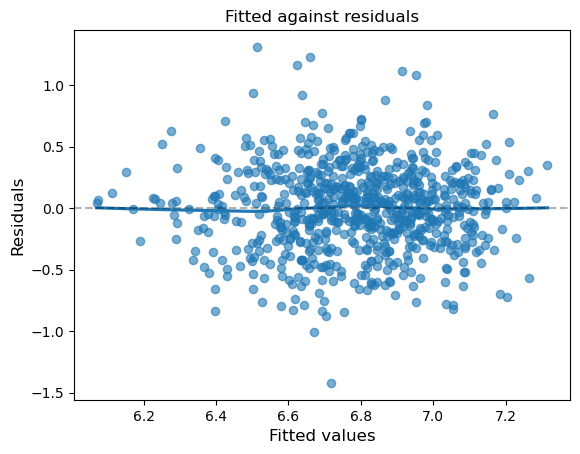

In [1046]:
resid = model.resid
fitted = model.fittedvalues
fig, ax= plt.subplots()
sns.regplot(x=fitted, y=resid, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Fitted values',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('Fitted against residuals')
plt.axhline(color='Black', alpha=0.3, linestyle='--')
plt.savefig('Model 7 resid')  
plt.show()

In [1265]:
#Model 7 DFBETA, DFBETAS and Cooks

infl_re = model.get_influence()
hatvals_re = infl_re.hat_matrix_diag    # hat values
t_resid_re = infl_re.resid_studentized_external  # externally Studentised residuals
(c_re, _) = infl_re.cooks_distance    # Cooks distance.
dfbs_re = infl_re.dfbetas              # DFBETAS
(dff_re, dffs_re) = infl_re.dffits     # DFFITS, ignore dffs_re as it is already standardised

# Check if they exceed the thresholds: cook_threshold = 4 / n, dfbetas_threshold = 2 / sqrt(n)
n, p= dfbs_re.shape

cook_threshold = 4/n
dfbetas_threshold = 2/np.sqrt(n)
dffits_threshold = 2*np.sqrt(p)/np.sqrt(n)

cooks_values=np.zeros(n)
for i in range(n):
    if c_re[i] >= cook_threshold:
        cooks_values[i] == 1
    else:
        cooks_values[i] == 0 
flagged_indices_cooks = np.where(cooks_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on Cook's Distance.")
else:
    print("Influential points based on Cook's Distance:")
    print(flagged_indices_cooks)

dfbetas_values = np.zeros(dfbs_re.shape)
for i in range(n):
    for j in range(p):
        if np.abs(dfbs_re[i,j]) >= dfbetas_threshold:
            dfbetas_values[i,j] == 1
        else:
            dfbetas_values[i,j] == 0
flagged_indices_dfb = np.where(dfbetas_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFBETAS.")
else:
    print("Influential points based on DFBETAS:")
    print(flagged_indices_dfb)

dffit_values = np.zeros(n)
for i in range(n):
   if np.abs(dff_re[i]) >= dffits_threshold:
       dffit_values[i] == 1
   else:
        dffit_values[i] == 0
flagged_indices_dff = np.where(dffit_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFFITS.")
else:
    print("Influential points based on DFFITS:")
    print(flagged_indices_dff)

No influential points based on Cook's Distance.
No influential points based on DFBETAS.
No influential points based on DFFITS.


### Model 8 - Log Model with Spline Tenure

In [1049]:
xi1 = 5

# Create piecewise linear spline terms
train['tenure_step'] = (train['tenure'] > xi1) * (train['tenure'] - xi1)

In [1050]:
model = smf.ols('lwage ~ IQ + tenure + tenure_step + urban + educ + married + exper + black + hours', data=train).fit(cov_type = 'HC0')
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     34.69
Date:                Wed, 28 May 2025   Prob (F-statistic):           5.44e-51
Time:                        15:44:51   Log-Likelihood:                -270.80
No. Observations:                 733   AIC:                             561.6
Df Residuals:                     723   BIC:                             607.6
Df Model:                           9                                         
Covariance Type:                  HC0                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.2541      0.173     30.446      0.000       4.916       5.592
IQ              0.0047      0.001      4.360      0.000       0.003       0.007
tenure          0.0266      0.011      2.420      0.016       0.005       0.048
tenure_step    -0.0206      0.013     -1.535      0.125      -0.047       0.006
urban           0.1847      0.028      6.482      0.000       0.129       0.241
educ            0.0529      0.008      6.377      0.000       0.037       0.069
married         0.2022      0.044      4.641      0.000       0.117       0.288
exper           0.0153      0.004      4.216      0.000       0.008       0.022
black          -0.1832      0.043     -4.268      0.000      -0.267      -0.099
hours          -0.0056      0.002     -2.512      0.012      -0.010      -0.001
==============================================================================
Omnibus:                        7.873   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.020   Jarque-Bera (JB):               11.338
Skew:                           0.034   Prob(JB):                      0.00345
Kurtosis:                       3.605   Cond. No.                     1.43e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1051]:
model.mse_resid**0.5

0.35252778309686594

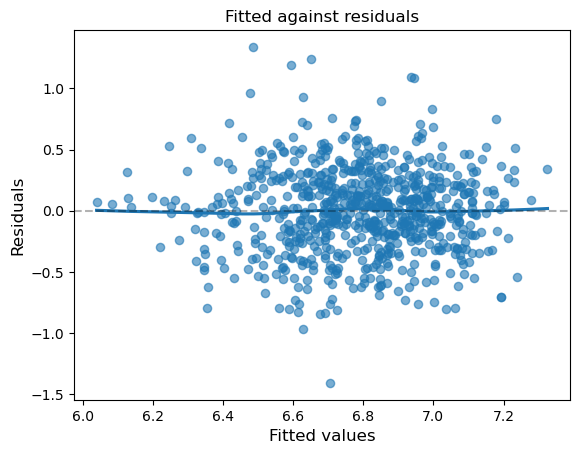

In [1052]:
resid = model.resid
fitted = model.fittedvalues
fig, ax= plt.subplots()
sns.regplot(x=fitted, y=resid, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Fitted values',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('Fitted against residuals')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  
plt.savefig('Model 8 resid')
plt.show()

In [1263]:
#Model 8 DFBETA, DFBETAS and Cooks

infl_re = model.get_influence()
hatvals_re = infl_re.hat_matrix_diag    # hat values
t_resid_re = infl_re.resid_studentized_external  # externally Studentised residuals
(c_re, _) = infl_re.cooks_distance    # Cooks distance.
dfbs_re = infl_re.dfbetas              # DFBETAS
(dff_re, dffs_re) = infl_re.dffits     # DFFITS, ignore dffs_re as it is already standardised

# Check if they exceed the thresholds: cook_threshold = 4 / n, dfbetas_threshold = 2 / sqrt(n)
n, p= dfbs_re.shape

cook_threshold = 4/n
dfbetas_threshold = 2/np.sqrt(n)
dffits_threshold = 2*np.sqrt(p)/np.sqrt(n)

cooks_values=np.zeros(n)
for i in range(n):
    if c_re[i] >= cook_threshold:
        cooks_values[i] == 1
    else:
        cooks_values[i] == 0 
flagged_indices_cooks = np.where(cooks_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on Cook's Distance.")
else:
    print("Influential points based on Cook's Distance:")
    print(flagged_indices_cooks)

dfbetas_values = np.zeros(dfbs_re.shape)
for i in range(n):
    for j in range(p):
        if np.abs(dfbs_re[i,j]) >= dfbetas_threshold:
            dfbetas_values[i,j] == 1
        else:
            dfbetas_values[i,j] == 0
flagged_indices_dfb = np.where(dfbetas_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFBETAS.")
else:
    print("Influential points based on DFBETAS:")
    print(flagged_indices_dfb)

dffit_values = np.zeros(n)
for i in range(n):
   if np.abs(dff_re[i]) >= dffits_threshold:
       dffit_values[i] == 1
   else:
        dffit_values[i] == 0
flagged_indices_dff = np.where(dffit_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFFITS.")
else:
    print("Influential points based on DFFITS:")
    print(flagged_indices_dff)

No influential points based on Cook's Distance.
No influential points based on DFBETAS.
No influential points based on DFFITS.


### Model 9 - Log Model with Splines

In [1055]:
iq1 = train['IQ'].quantile(0.2)
iq2 = train['IQ'].quantile(0.4)
iq3 = train['IQ'].quantile(0.6)
iq4 = train['IQ'].quantile(0.8)

train['IQ_step1'] = (train['IQ'] > iq1) * (train['IQ'] - iq1)
train['IQ_step2'] = (train['IQ'] > iq2) * (train['IQ'] - iq2)
train['IQ_step3'] = (train['IQ'] > iq3) * (train['IQ'] - iq3)
train['IQ_step4'] = (train['IQ'] > iq4) * (train['IQ'] - iq4)

kww1 = train['KWW'].quantile(0.2)
kww2 = train['KWW'].quantile(0.4)
kww3 = train['KWW'].quantile(0.6)
kww4 = train['KWW'].quantile(0.8)

train['KWW_step1'] = (train['KWW'] > kww1) * (train['KWW'] - kww1)
train['KWW_step2'] = (train['KWW'] > kww2) * (train['KWW'] - kww2)
train['KWW_step3'] = (train['KWW'] > kww3) * (train['KWW'] - kww3)
train['KWW_step4'] = (train['KWW'] > kww4) * (train['KWW'] - kww4)

t1 = train['tenure'].quantile(0.2)
t2 = train['tenure'].quantile(0.4)
t3 = train['tenure'].quantile(0.6)
t4 = train['tenure'].quantile(0.8)

# Create piecewise spline terms
train['tenure_step1'] = (train['tenure'] > t1) * (train['tenure'] - t1)
train['tenure_step2'] = (train['tenure'] > t2) * (train['tenure'] - t2)
train['tenure_step3'] = (train['tenure'] > t3) * (train['tenure'] - t3)
train['tenure_step4'] = (train['tenure'] > t4) * (train['tenure'] - t4)

In [1056]:
def forward_selected(data, response, nominated = []):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    selected = nominated
    remaining.remove(response)
    remaining ^= set(selected)
    current_score, best_new_score = 0.0, 0.0
    if nominated:
        formula = "{} ~ {} + 1".format(response, ' + '.join(nominated))
        current_score= smf.ols(formula, data).fit().rsquared_adj
        best_new_score = current_score
        print("you nominated variable(s) %s, the adj_r2 is: %f" %(nominated, current_score))
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            print("adding %s increases adj_r2 from %f to %f" %(best_candidate, current_score, best_new_score))
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    print("final model is %s, with adj_r2 of %f" %(formula, model.rsquared_adj))
    return model

In [1057]:
df = train[['lwage', 'educ', 'exper', 'KWW_step1', 'KWW_step2', 'KWW_step3', 'KWW_step4', "IQ_step1", 'IQ_step2', 'IQ_step3', 'IQ_step4', 'tenure_step1', 'tenure_step2', 'tenure_step3', 'tenure_step4', 'hours', 'IQ', 'KWW', 'tenure', 'age', 'married', 'black', 'south', 'urban', 'sibs', 'meduc', 'feduc']]

In [1058]:
model = forward_selected(df, 'lwage')

adding IQ increases adj_r2 from 0.000000 to 0.102645
adding KWW_step2 increases adj_r2 from 0.102645 to 0.149328
adding urban increases adj_r2 from 0.149328 to 0.177351
adding tenure increases adj_r2 from 0.177351 to 0.201693
adding married increases adj_r2 from 0.201693 to 0.220959
adding educ increases adj_r2 from 0.220959 to 0.239612
adding black increases adj_r2 from 0.239612 to 0.253003
adding exper increases adj_r2 from 0.253003 to 0.265600
adding hours increases adj_r2 from 0.265600 to 0.275576
adding tenure_step1 increases adj_r2 from 0.275576 to 0.282216
adding south increases adj_r2 from 0.282216 to 0.285259
adding KWW increases adj_r2 from 0.285259 to 0.286713
adding KWW_step4 increases adj_r2 from 0.286713 to 0.287169
final model is lwage ~ IQ + KWW_step2 + urban + tenure + married + educ + black + exper + hours + tenure_step1 + south + KWW + KWW_step4 + 1, with adj_r2 of 0.287169


In [1059]:
model = smf.ols('lwage ~ IQ + KWW + KWW_step2 + urban + tenure + tenure_step1 + married + educ + black + exper + hours + south + black_tenure', data=train).fit(cov_type='HC0')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     26.40
Date:                Wed, 28 May 2025   Prob (F-statistic):           1.01e-52
Time:                        15:44:53   Log-Likelihood:                -256.93
No. Observations:                 733   AIC:                             541.9
Df Residuals:                     719   BIC:                             606.2
Df Model:                          13                                         
Covariance Type:                  HC0                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.6308      0.208     27.038      0.000       5.223       6.039
IQ               0.0039      0.001      3.554      0.000       0.002       0.006
KWW             -0.0061      0.004     -1.583      0.113      -0.014       0.001
KWW_step2        0.0199      0.006      3.333      0.001       0.008       0.032
urban            0.1736      0.028      6.157      0.000       0.118       0.229
tenure           0.0845      0.036      2.362      0.018       0.014       0.155
tenure_step1    -0.0806      0.037     -2.192      0.028      -0.153      -0.009
married          0.1861      0.041      4.509      0.000       0.105       0.267
educ             0.0440      0.009      5.135      0.000       0.027       0.061
black           -0.2909      0.077     -3.802      0.000      -0.441      -0.141
exper            0.0125      0.004      3.458      0.001       0.005       0.020
hours           -0.0061      0.002     -2.810      0.005      -0.010      -0.002
south           -0.0574      0.030     -1.902      0.057      -0.117       0.002
black_tenure     0.0197      0.008      2.540      0.011       0.004       0.035
==============================================================================
Omnibus:                        6.382   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                8.696
Skew:                           0.006   Prob(JB):                       0.0129
Kurtosis:                       3.533   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1060]:
model.mse_resid**0.5

0.3468804307866778

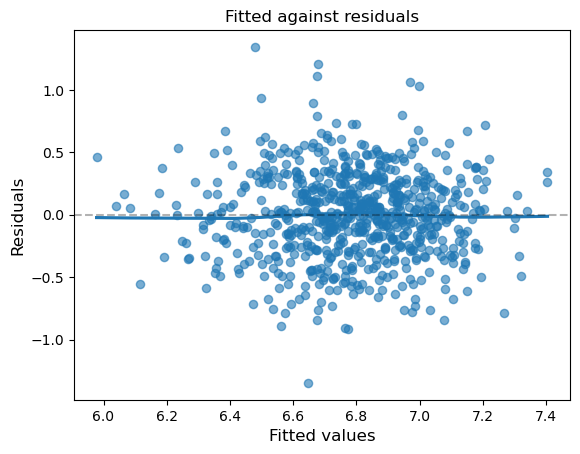

In [1061]:
resid = model.resid
fitted = model.fittedvalues
fig, ax= plt.subplots()
sns.regplot(x=fitted, y=resid, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Fitted values',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('Fitted against residuals')
plt.axhline(color='Black', alpha=0.3, linestyle='--')
plt.savefig('model 9 resid')  
plt.show()

In [1261]:
#Model 9 DFBETA, DFBETAS and Cooks

infl_re = model.get_influence()
hatvals_re = infl_re.hat_matrix_diag    # hat values
t_resid_re = infl_re.resid_studentized_external  # externally Studentised residuals
(c_re, _) = infl_re.cooks_distance    # Cooks distance.
dfbs_re = infl_re.dfbetas              # DFBETAS
(dff_re, dffs_re) = infl_re.dffits     # DFFITS, ignore dffs_re as it is already standardised

# Check if they exceed the thresholds: cook_threshold = 4 / n, dfbetas_threshold = 2 / sqrt(n)
n, p= dfbs_re.shape

cook_threshold = 4/n
dfbetas_threshold = 2/np.sqrt(n)
dffits_threshold = 2*np.sqrt(p)/np.sqrt(n)

cooks_values=np.zeros(n)
for i in range(n):
    if c_re[i] >= cook_threshold:
        cooks_values[i] == 1
    else:
        cooks_values[i] == 0 
flagged_indices_cooks = np.where(cooks_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on Cook's Distance.")
else:
    print("Influential points based on Cook's Distance:")
    print(flagged_indices_cooks)

dfbetas_values = np.zeros(dfbs_re.shape)
for i in range(n):
    for j in range(p):
        if np.abs(dfbs_re[i,j]) >= dfbetas_threshold:
            dfbetas_values[i,j] == 1
        else:
            dfbetas_values[i,j] == 0
flagged_indices_dfb = np.where(dfbetas_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFBETAS.")
else:
    print("Influential points based on DFBETAS:")
    print(flagged_indices_dfb)

dffit_values = np.zeros(n)
for i in range(n):
   if np.abs(dff_re[i]) >= dffits_threshold:
       dffit_values[i] == 1
   else:
        dffit_values[i] == 0
flagged_indices_dff = np.where(dffit_values == 1)[0]
if len(flagged_indices) == 0:
    print("No influential points based on DFFITS.")
else:
    print("Influential points based on DFFITS:")
    print(flagged_indices_dff)

No influential points based on Cook's Distance.
No influential points based on DFBETAS.
No influential points based on DFFITS.


## Part 6

### Model 3

In [1281]:
model_3 = smf.ols('lwage ~ IQ + tenure + urban + educ + married + exper + black + hours', data=train).fit(cov_type = 'HC0')
lwage_preds = model_4.predict(test)

#actual wages (exp
actual_wages = np.exp(test['lwage'])
#transform prediction back to original scale from log
predicted_wages = np.exp(lwage_preds)
#residuals 
resid = actual_wages - predicted_wages
print(model_3.llf, model_3.aic, model_3.bic)     # Log-likelihood, AIC and BIC

-272.1028945742437 562.2057891484874 603.5801004654672


In [1283]:
#RSME, MAD and Forecasted R2
RSME= np.sqrt(np.mean((predicted_wages - actual_wages)**2))
MAD = np.mean(np.abs(predicted_wages - actual_wages))

SS_res = sum((actual_wages - predicted_wages)**2)
SS_tot = sum((actual_wages - np.mean(actual_wages))**2)
Forecasted_R2 = 1-(SS_res/SS_tot)

n = test.shape[0]
k = model_3.params.shape[0]-1
forecasted_adj_r2 = 1- ((1-Forecasted_R2)*(n-1)/(n-k-1))

print(RSME)
print(MAD)
print(Forecasted_R2)
print(forecasted_adj_r2)

371.9229053977986
268.9004146057508
0.2220397568084067
0.186271469765115


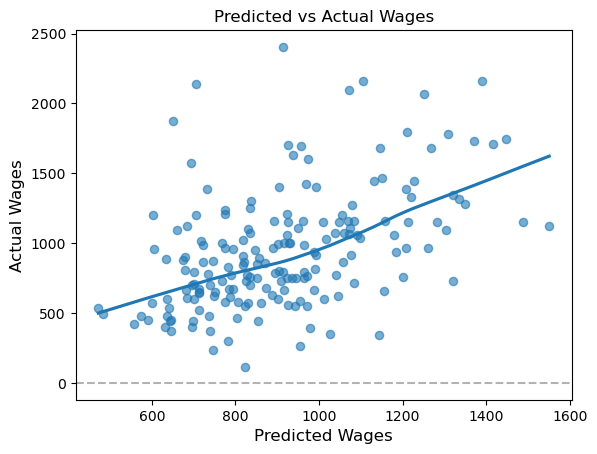

<function matplotlib.pyplot.show(close=None, block=None)>

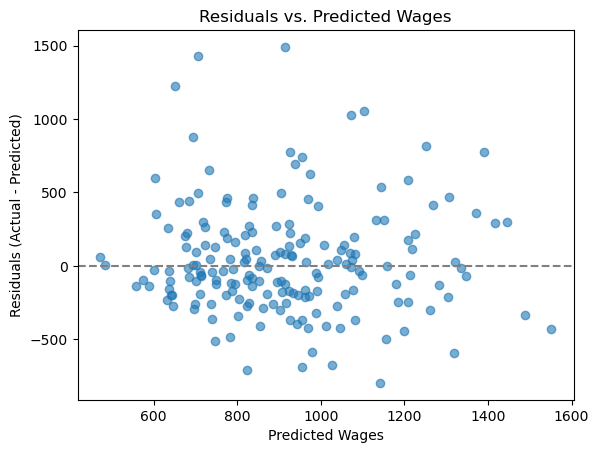

In [1287]:
#Predicted vs Actual Wages (Scatterplot)
predicted = predicted_wages
actual = actual_wages
fig, ax= plt.subplots()
sns.regplot(x=predicted, y=actual, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Predicted Wages',  {'fontsize': 12})
ax.set_ylabel('Actual Wages', {'fontsize': 12})
ax.set_title('Predicted vs Actual Wages')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  
plt.show()

#Residuals vs Predicted Wages
fig, ax = plt.subplots()

# Step 2: Scatterplot
ax.scatter(predicted_wages, resid, alpha=0.6)

# Step 3: Reference line at y = 0
ax.axhline(0, color='grey', linestyle='--')

# Step 4: Labels and title
ax.set_xlabel('Predicted Wages')
ax.set_ylabel('Residuals (Actual - Predicted)')
ax.set_title('Residuals vs. Predicted Wages')
plt.show

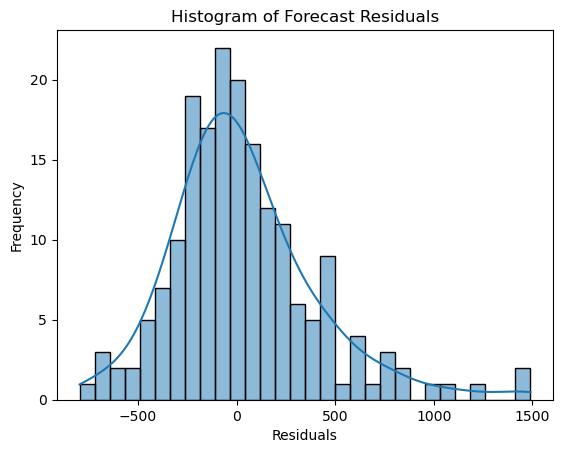

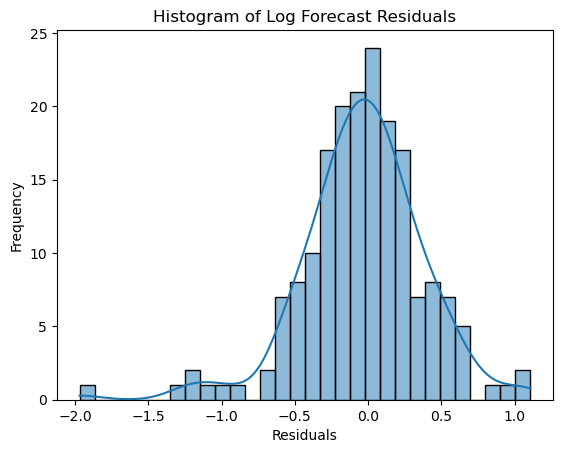

In [1289]:
#Histogram of Residuals
sns.histplot(resid, bins=30, kde=True)
plt.title('Histogram of Forecast Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

sns.histplot((test['lwage']-lwage_preds), bins=30, kde=True)
plt.title('Histogram of Log Forecast Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Model 4

In [1291]:
test['black_tenure'] = test['black'] * test['tenure']

model_4 = smf.ols('lwage ~ IQ + tenure + urban + educ + married + exper + black + hours + black_tenure', data=train).fit(cov_type = 'HC0')
lwage_preds = model_4.predict(test)

#actual wages (exp
actual_wages = np.exp(test['lwage'])
#transform prediction back to original scale from log
predicted_wages = np.exp(lwage_preds)
#residuals 
resid = actual_wages - predicted_wages
print(model_4.llf, model_4.aic, model_4.bic)     # Log-likelihood, AIC and BIC

-269.7358871062578 559.4717742125156 605.4432312313821


In [1293]:
#RSME, MAD and Forecasted R2
RSME= np.sqrt(np.mean((predicted_wages - actual_wages)**2))
MAD = np.mean(np.abs(predicted_wages - actual_wages))

SS_res = sum((actual_wages - predicted_wages)**2)
SS_tot = sum((actual_wages - np.mean(actual_wages))**2)
Forecasted_R2 = 1-(SS_res/SS_tot)

n = test.shape[0]
k = model_5.params.shape[0]-1
forecasted_adj_r2 = 1- ((1-Forecasted_R2)*(n-1)/(n-k-1))

print(RSME)
print(MAD)
print(Forecasted_R2)
print(forecasted_adj_r2)

371.60624254262217
268.6906712761815
0.22336393573921576
0.18296090349443506


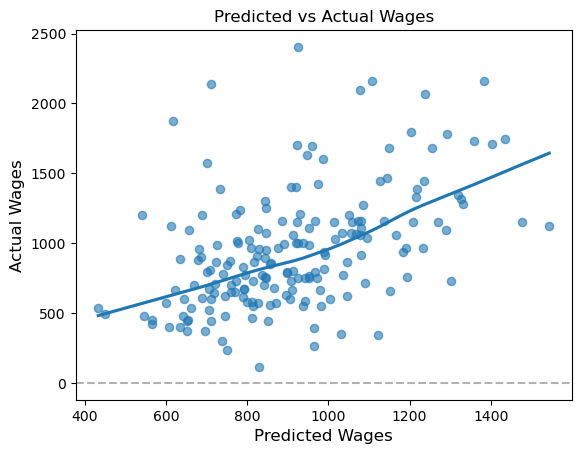

<function matplotlib.pyplot.show(close=None, block=None)>

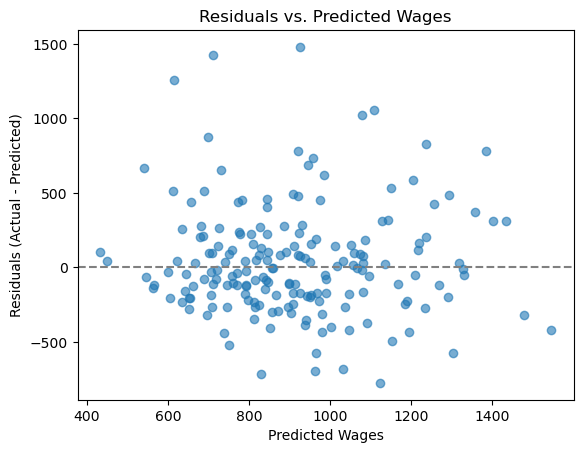

In [1295]:
#Predicted vs Actual Wages (Scatterplot)
predicted = predicted_wages
actual = actual_wages
fig, ax= plt.subplots()
sns.regplot(x=predicted, y=actual, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Predicted Wages',  {'fontsize': 12})
ax.set_ylabel('Actual Wages', {'fontsize': 12})
ax.set_title('Predicted vs Actual Wages')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  
plt.show()

#Residuals vs Predicted Wages
fig, ax = plt.subplots()

# Step 2: Scatterplot
ax.scatter(predicted_wages, resid, alpha=0.6)

# Step 3: Reference line at y = 0
ax.axhline(0, color='grey', linestyle='--')

# Step 4: Labels and title
ax.set_xlabel('Predicted Wages')
ax.set_ylabel('Residuals (Actual - Predicted)')
ax.set_title('Residuals vs. Predicted Wages')
plt.show

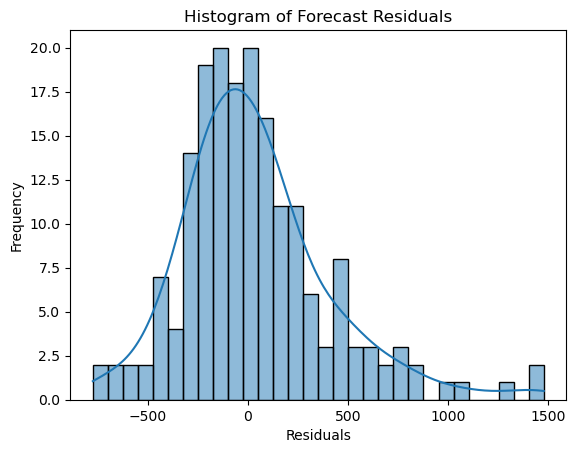

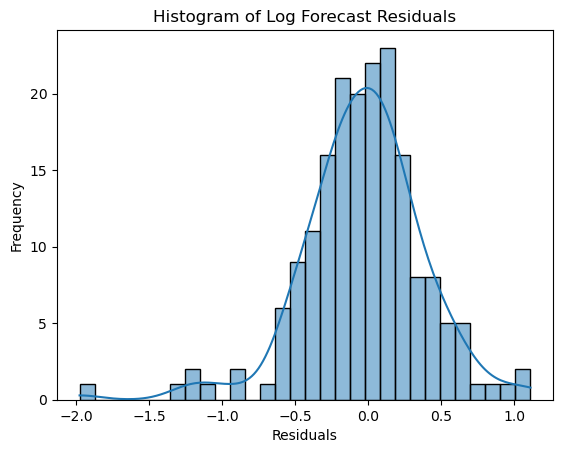

In [1297]:
#Histogram of Residuals
sns.histplot(resid, bins=30, kde=True)
plt.title('Histogram of Forecast Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

sns.histplot((test['lwage']-lwage_preds), bins=30, kde=True)
plt.title('Histogram of Log Forecast Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Model 5

In [1299]:
xi = 34

# Create the spline variable (positive part only)
test['KWW_step'] = (test['KWW'] > xi) * (test['KWW'] - xi)

model_5 = smf.ols('lwage ~ IQ + tenure + urban + educ + married + exper + black + hours + KWW + KWW_step', data=train).fit(cov_type = 'HC0')
lwage_preds = model_5.predict(test)

#actual wages (exp
actual_wages = np.exp(test['lwage'])
#transform prediction back to original scale from log
predicted_wages = np.exp(lwage_preds)
#residuals 
resid = actual_wages - predicted_wages

print(model_5.llf, model_5.aic, model_5.bic)     # Log-likelihood, AIC and BIC

-265.36835817118435 552.7367163423687 603.3053190631218


In [1301]:
#RSME, MAD and Forecasted R2 and Forecasted Adj-R2
RSME= np.sqrt(np.mean((predicted_wages - actual_wages)**2))
MAD = np.mean(np.abs(predicted_wages - actual_wages))

SS_res = sum((actual_wages - predicted_wages)**2)
SS_tot = sum((actual_wages - np.mean(actual_wages))**2)
Forecasted_R2 = 1-(SS_res/SS_tot)

n = test.shape[0]
k = model_6.params.shape[0]-1
forecasted_adj_r2 = 1- ((1-Forecasted_R2)*(n-1)/(n-k-1))

print(RSME)
print(MAD)
print(Forecasted_R2)
print(forecasted_adj_r2)

365.22850639389253
261.3934235415393
0.2497933902042403
0.20617672684402166


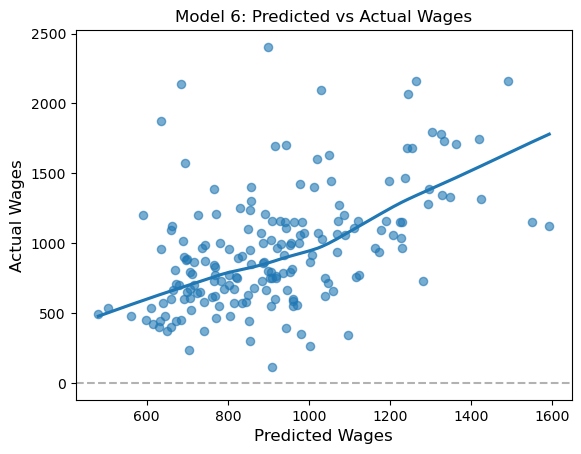

<function matplotlib.pyplot.show(close=None, block=None)>

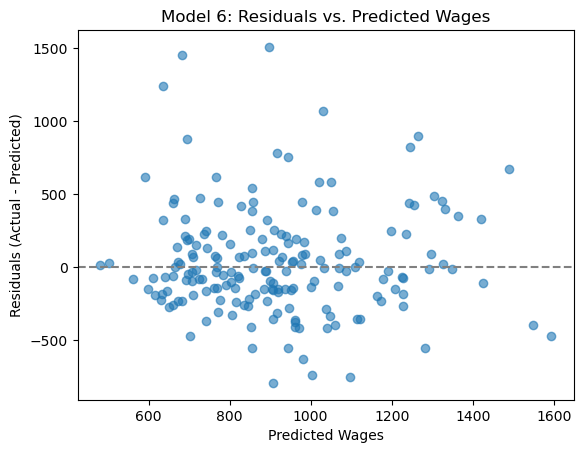

In [1245]:
#Predicted vs Actual Wages (Scatterplot)
predicted = predicted_wages
actual = actual_wages
fig, ax= plt.subplots()
sns.regplot(x=predicted, y=actual, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Predicted Wages',  {'fontsize': 12})
ax.set_ylabel('Actual Wages', {'fontsize': 12})
ax.set_title('Predicted vs Actual Wages')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  
plt.show()

#Residuals vs Predicted Wages
fig, ax = plt.subplots()

# Step 2: Scatterplot
ax.scatter(predicted_wages, resid, alpha=0.6)

# Step 3: Reference line at y = 0
ax.axhline(0, color='grey', linestyle='--')

# Step 4: Labels and title
ax.set_xlabel('Predicted Wages')
ax.set_ylabel('Residuals (Actual - Predicted)')
ax.set_title('MResiduals vs. Predicted Wages')
plt.show

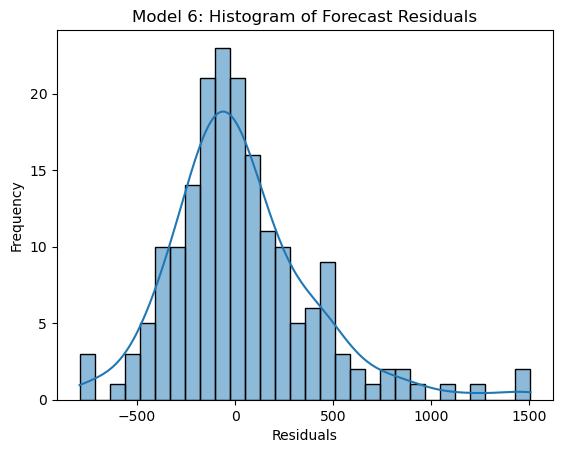

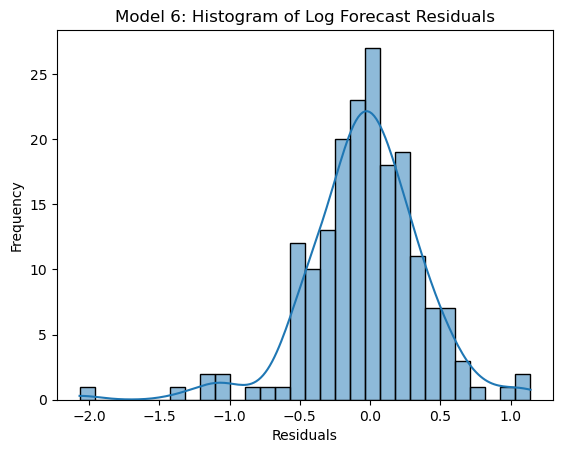

In [1246]:
#Histogram of Residuals
sns.histplot(resid, bins=30, kde=True)
plt.title('Model 6: Histogram of Forecast Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

sns.histplot((test['lwage']-lwage_preds), bins=30, kde=True)
plt.title('Model 6: Histogram of Log Forecast Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()